# GPU 할당 (주피터 노트북 텐서플로)

In [139]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15090964432130109316
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6302793728
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12255669884143556161
physical_device_desc: "device: 0, name: GeForce RTX 2060 SUPER, pci bus id: 0000:07:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


# 2019.04~2024.03 데이터 전처리

In [405]:
import pandas as pd

# 월별 구인인원, 구직건수 컬럼 생성(이중 컬럼 제거, 취업건수는 참고용)
def generate_date_columns(start_year, start_month, end_year, end_month):
    columns = []
    current_year = start_year
    current_month = start_month

    while current_year < end_year or (current_year == end_year and current_month <= end_month):
        columns.append(f"{current_year}년_{current_month}월_구인인원")
        columns.append(f"{current_year}년_{current_month}월_구직건수")
        columns.append(f"{current_year}년_{current_month}월_취업건수")
        if current_month == 12:
            current_month = 1
            current_year += 1
        else:
            current_month += 1
    return columns

# 이거 숫자 바꿔야함!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
def clean_job_data(sheet_name=0, start_year=2019, start_month=4, end_year=2024, end_month=3):
    
    # 데이터셋 로드
    df = pd.read_excel("2019.04~2024.03.xlsx", sheet_name=sheet_name, skiprows=7)
    
    # 쓸데 없는 컬럼, 로우 제거
    df = df.dropna(how='all', axis=1)  
    df = df.dropna(how='all')   
    
    # 첫번째 행부터가 실제 데이터 (윗줄 지움)
    df.columns = df.iloc[0]
    df = df[1:]
    
    # 함수에서 설정한 날짜 범위로 날짜 열 생성
    date_columns = generate_date_columns(start_year, start_month, end_year, end_month)
    
    # 컬럼 합치기
    column_names = ["지역", "직종_중분류"] + date_columns
    
    # 컬럼 이름 변경
    df.columns = column_names
    
    # 지역 빈 값들 채우기(다음 지역 나타나기 전까지)
    df['지역'] = df['지역'].fillna(method='ffill')
    
    # 직종 중분류 없는 데이터 지우기
    df = df.dropna(subset=['직종_중분류'])
    
    # 인덱스 초기화
    df = df.reset_index(drop=True)
    
    if df.iloc[0, 0] == '지역' or df.iloc[0, 1] == '직종_중분류':
        df = df.drop(0).reset_index(drop=True)
    
    return df

In [406]:
# 데이터 생성
cleaned_df = clean_job_data()
print(cleaned_df.head())

C:\Download\anaconda\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


     지역              직종_중분류 2019년_4월_구인인원 2019년_4월_구직건수 2019년_4월_취업건수  \
0  지역무관  2018직종_관리직(임원·부서장)             0           591           178   
1  지역무관    2018직종_경영·행정·사무직             0          2019           691   
2  지역무관       2018직종_금융·보험직             0            58            24   
3  지역무관  2018직종_인문·사회과학 연구직             0            15             6   
4  지역무관  2018직종_자연·생명과학 연구직             0            73            26   

  2019년_5월_구인인원 2019년_5월_구직건수 2019년_5월_취업건수 2019년_6월_구인인원 2019년_6월_구직건수  ...  \
0             0           559           187             0           513  ...   
1             0          1918           627             0          2078  ...   
2             0            64            16             0            60  ...   
3             0             8             3             0            14  ...   
4             0            46            20             0            67  ...   

  2023년_12월_취업건수 2024년_1월_구인인원 2024년_1월_구직건수 2024년_1월_취업건수 2024년_2월_구인인원  \
0   

In [408]:
# 지역 무관 제거
cleaned_df = cleaned_df[cleaned_df['지역'] != '지역무관']
cleaned_df

,지역,직종_중분류,2019년_4월_구인인원,2019년_4월_구직건수,2019년_4월_취업건수,2019년_5월_구인인원,2019년_5월_구직건수,2019년_5월_취업건수,2019년_6월_구인인원,2019년_6월_구직건수,...,2023년_12월_취업건수,2024년_1월_구인인원,2024년_1월_구직건수,2024년_1월_취업건수,2024년_2월_구인인원,2024년_2월_구직건수,2024년_2월_취업건수,2024년_3월_구인인원,2024년_3월_구직건수,2024년_3월_취업건수
36,서울특별시,2018직종_관리직(임원·부서장),0,1893,522,0,1728,494,0,1539,...,381,0,2286,526,0,1666,410,0,1751,571
37,서울특별시,2018직종_경영·행정·사무직,0,9929,3059,0,9029,2764,0,8534,...,2772,0,14471,3670,0,10168,3080,0,11900,3954
38,서울특별시,2018직종_금융·보험직,0,505,150,0,449,131,0,359,...,150,0,1118,312,0,786,239,0,931,269
39,서울특별시,2018직종_인문·사회과학 연구직,0,101,31,0,75,25,0,54,...,13,0,200,18,0,96,15,0,126,56
40,서울특별시,2018직종_자연·생명과학 연구직,0,132,51,0,89,38,0,97,...,41,0,392,65,0,255,56,0,366,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11110,재택근무,2018직종_섬유·의복 생산직,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11111,재택근무,2018직종_식품가공·생산직,0,1,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11112,재택근무,2018직종_인쇄·목재·공예 및 기타 설치·정비·생산직,0,3,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11113,재택근무,2018직종_제조 단순직,0,1,1,0,3,1,0,3,...,0,0,0,0,0,0,0,0,0,0


In [409]:
# 재택 근무 제거
cleaned_df = cleaned_df[cleaned_df['지역'] != '재택근무']
cleaned_df

,지역,직종_중분류,2019년_4월_구인인원,2019년_4월_구직건수,2019년_4월_취업건수,2019년_5월_구인인원,2019년_5월_구직건수,2019년_5월_취업건수,2019년_6월_구인인원,2019년_6월_구직건수,...,2023년_12월_취업건수,2024년_1월_구인인원,2024년_1월_구직건수,2024년_1월_취업건수,2024년_2월_구인인원,2024년_2월_구직건수,2024년_2월_취업건수,2024년_3월_구인인원,2024년_3월_구직건수,2024년_3월_취업건수
36,서울특별시,2018직종_관리직(임원·부서장),0,1893,522,0,1728,494,0,1539,...,381,0,2286,526,0,1666,410,0,1751,571
37,서울특별시,2018직종_경영·행정·사무직,0,9929,3059,0,9029,2764,0,8534,...,2772,0,14471,3670,0,10168,3080,0,11900,3954
38,서울특별시,2018직종_금융·보험직,0,505,150,0,449,131,0,359,...,150,0,1118,312,0,786,239,0,931,269
39,서울특별시,2018직종_인문·사회과학 연구직,0,101,31,0,75,25,0,54,...,13,0,200,18,0,96,15,0,126,56
40,서울특별시,2018직종_자연·생명과학 연구직,0,132,51,0,89,38,0,97,...,41,0,392,65,0,255,56,0,366,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11075,전북특별자치도 부안군,2018직종_섬유·의복 생산직,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11076,전북특별자치도 부안군,2018직종_식품가공·생산직,0,0,0,0,0,0,0,0,...,0,12,10,5,16,4,4,30,10,9
11077,전북특별자치도 부안군,2018직종_인쇄·목재·공예 및 기타 설치·정비·생산직,0,0,0,0,0,0,0,0,...,0,0,9,0,0,0,0,0,0,3
11078,전북특별자치도 부안군,2018직종_제조 단순직,0,0,0,0,0,0,0,0,...,0,16,24,2,13,7,1,10,12,7


In [410]:
# 현재 상태 데이터의 지역명 개수 확인
print(cleaned_df['지역'].nunique())
print(cleaned_df['지역'].unique())
unnomalized_place = cleaned_df['지역'].unique()

320
['서울특별시' '서울특별시 종로구' '서울특별시 중구' '서울특별시 용산구' '서울특별시 성동구' '서울특별시 광진구'
 '서울특별시 동대문구' '서울특별시 중랑구' '서울특별시 성북구' '서울특별시 강북구' '서울특별시 도봉구' '서울특별시 노원구'
 '서울특별시 은평구' '서울특별시 서대문구' '서울특별시 마포구' '서울특별시 양천구' '서울특별시 강서구' '서울특별시 구로구'
 '서울특별시 금천구' '서울특별시 영등포구' '서울특별시 동작구' '서울특별시 관악구' '서울특별시 서초구' '서울특별시 강남구'
 '서울특별시 송파구' '서울특별시 강동구' '부산광역시' '부산광역시 중구' '부산광역시 서구' '부산광역시 동구'
 '부산광역시 영도구' '부산광역시 부산진구' '부산광역시 동래구' '부산광역시 남구' '부산광역시 북구' '부산광역시 해운대구'
 '부산광역시 사하구' '부산광역시 금정구' '부산광역시 강서구' '부산광역시 연제구' '부산광역시 수영구' '부산광역시 사상구'
 '부산광역시 기장군' '대구광역시' '대구광역시 중구' '대구광역시 동구' '대구광역시 서구' '대구광역시 남구'
 '대구광역시 북구' '대구광역시 수성구' '대구광역시 달서구' '대구광역시 달성군' '대구광역시 군위군' '인천광역시'
 '인천광역시 중구' '인천광역시 동구' '인천광역시 남구' '인천광역시 미추홀구' '인천광역시 연수구' '인천광역시 남동구'
 '인천광역시 부평구' '인천광역시 계양구' '인천광역시 서구' '인천광역시 강화군' '인천광역시 옹진군' '광주광역시'
 '광주광역시 동구' '광주광역시 서구' '광주광역시 남구' '광주광역시 북구' '광주광역시 광산구' '대전광역시'
 '대전광역시 동구' '대전광역시 중구' '대전광역시 서구' '대전광역시 유성구' '대전광역시 대덕구' '울산광역시'
 '울산광역시 중구' '울산광역시 남구' '울산광역시 동구' '울산광역시 북구' '울산광역시 울주군' '세종특별자치시' '경기도'
 '경기도 수원시' '경기도 수원

In [421]:
# 제거할 '지역' 리스트 (총계 행 삭제)
regions_to_remove = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', 
                     '울산광역시', '경기도', '강원도', '충청북도', '충청남도', 
                     '전라북도', '전라남도', '경상북도', '경상남도', '제주도', '강원특별자치도 ', '전북특별자치도 ']

# '지역' 열이 리스트와 정확히 일치하는 행만 제거
filtered_df = cleaned_df[~cleaned_df['지역'].isin(regions_to_remove)]

# 결과 출력
print(filtered_df)

                지역                          직종_중분류 2019년_4월_구인인원  \
72       서울특별시 종로구              2018직종_관리직(임원·부서장)             4   
73       서울특별시 종로구                2018직종_경영·행정·사무직           120   
74       서울특별시 종로구                   2018직종_금융·보험직             7   
75       서울특별시 종로구              2018직종_인문·사회과학 연구직             1   
76       서울특별시 종로구              2018직종_자연·생명과학 연구직             1   
...            ...                             ...           ...   
11075  전북특별자치도 부안군                2018직종_섬유·의복 생산직             0   
11076  전북특별자치도 부안군                 2018직종_식품가공·생산직             0   
11077  전북특별자치도 부안군  2018직종_인쇄·목재·공예 및 기타 설치·정비·생산직             0   
11078  전북특별자치도 부안군                   2018직종_제조 단순직             0   
11079  전북특별자치도 부안군                    2018직종_농림어업직             0   

      2019년_4월_구직건수 2019년_4월_취업건수 2019년_5월_구인인원 2019년_5월_구직건수 2019년_5월_취업건수  \
72               28             7             7            22             7   
73              232      

In [422]:
# 현재 상태의 지역명 개수 확인
print(filtered_df['지역'].nunique())
print(filtered_df['지역'].unique())
unnomalized_place = filtered_df['지역'].unique()

302
['서울특별시 종로구' '서울특별시 중구' '서울특별시 용산구' '서울특별시 성동구' '서울특별시 광진구' '서울특별시 동대문구'
 '서울특별시 중랑구' '서울특별시 성북구' '서울특별시 강북구' '서울특별시 도봉구' '서울특별시 노원구' '서울특별시 은평구'
 '서울특별시 서대문구' '서울특별시 마포구' '서울특별시 양천구' '서울특별시 강서구' '서울특별시 구로구' '서울특별시 금천구'
 '서울특별시 영등포구' '서울특별시 동작구' '서울특별시 관악구' '서울특별시 서초구' '서울특별시 강남구' '서울특별시 송파구'
 '서울특별시 강동구' '부산광역시 중구' '부산광역시 서구' '부산광역시 동구' '부산광역시 영도구' '부산광역시 부산진구'
 '부산광역시 동래구' '부산광역시 남구' '부산광역시 북구' '부산광역시 해운대구' '부산광역시 사하구' '부산광역시 금정구'
 '부산광역시 강서구' '부산광역시 연제구' '부산광역시 수영구' '부산광역시 사상구' '부산광역시 기장군' '대구광역시 중구'
 '대구광역시 동구' '대구광역시 서구' '대구광역시 남구' '대구광역시 북구' '대구광역시 수성구' '대구광역시 달서구'
 '대구광역시 달성군' '대구광역시 군위군' '인천광역시 중구' '인천광역시 동구' '인천광역시 남구' '인천광역시 미추홀구'
 '인천광역시 연수구' '인천광역시 남동구' '인천광역시 부평구' '인천광역시 계양구' '인천광역시 서구' '인천광역시 강화군'
 '인천광역시 옹진군' '광주광역시 동구' '광주광역시 서구' '광주광역시 남구' '광주광역시 북구' '광주광역시 광산구'
 '대전광역시 동구' '대전광역시 중구' '대전광역시 서구' '대전광역시 유성구' '대전광역시 대덕구' '울산광역시 중구'
 '울산광역시 남구' '울산광역시 동구' '울산광역시 북구' '울산광역시 울주군' '세종특별자치시' '경기도 수원시'
 '경기도 수원시 장안구' '경기도 수원시 권선구' '경기도 수원시 팔달구' '경기도 수원시 영통구' '경기도 성남시'
 '경기

In [423]:
# 지역 이름 통일시켜주는 함수 생성
def normalize_region(region):
    if region.startswith('강원특별자치도'):
        return region.replace('강원특별자치도', '강원도')
    elif region.startswith('전북특별자치도'):
        return region.replace('전북특별자치도', '전라북도')
    return region

def normalize_region_jeonbuk(region):
    if region.startswith('전라북도 전주시완산구'):
        return region.replace('전주시완산구', '전주시 완산구')
    elif region.startswith('전라북도 전주시덕진구'):
        return region.replace('전주시덕진구', '전주시 덕진구')
    # 대구도 그냥 여기에 끼어서...
    elif region.startswith('경상북도 군위군'):
        return region.replace('경상북도', '대구광역시')
    return region


# '지역' 컬럼 변경
filtered_df['지역'] = filtered_df['지역'].apply(normalize_region)
filtered_df['지역'] = filtered_df['지역'].apply(normalize_region_jeonbuk)

# 현재 상태의 지역명 개수 확인
print(filtered_df['지역'].nunique())
print(filtered_df['지역'].unique())
nomalized_place = filtered_df['지역'].unique()

267
['서울특별시 종로구' '서울특별시 중구' '서울특별시 용산구' '서울특별시 성동구' '서울특별시 광진구' '서울특별시 동대문구'
 '서울특별시 중랑구' '서울특별시 성북구' '서울특별시 강북구' '서울특별시 도봉구' '서울특별시 노원구' '서울특별시 은평구'
 '서울특별시 서대문구' '서울특별시 마포구' '서울특별시 양천구' '서울특별시 강서구' '서울특별시 구로구' '서울특별시 금천구'
 '서울특별시 영등포구' '서울특별시 동작구' '서울특별시 관악구' '서울특별시 서초구' '서울특별시 강남구' '서울특별시 송파구'
 '서울특별시 강동구' '부산광역시 중구' '부산광역시 서구' '부산광역시 동구' '부산광역시 영도구' '부산광역시 부산진구'
 '부산광역시 동래구' '부산광역시 남구' '부산광역시 북구' '부산광역시 해운대구' '부산광역시 사하구' '부산광역시 금정구'
 '부산광역시 강서구' '부산광역시 연제구' '부산광역시 수영구' '부산광역시 사상구' '부산광역시 기장군' '대구광역시 중구'
 '대구광역시 동구' '대구광역시 서구' '대구광역시 남구' '대구광역시 북구' '대구광역시 수성구' '대구광역시 달서구'
 '대구광역시 달성군' '대구광역시 군위군' '인천광역시 중구' '인천광역시 동구' '인천광역시 남구' '인천광역시 미추홀구'
 '인천광역시 연수구' '인천광역시 남동구' '인천광역시 부평구' '인천광역시 계양구' '인천광역시 서구' '인천광역시 강화군'
 '인천광역시 옹진군' '광주광역시 동구' '광주광역시 서구' '광주광역시 남구' '광주광역시 북구' '광주광역시 광산구'
 '대전광역시 동구' '대전광역시 중구' '대전광역시 서구' '대전광역시 유성구' '대전광역시 대덕구' '울산광역시 중구'
 '울산광역시 남구' '울산광역시 동구' '울산광역시 북구' '울산광역시 울주군' '세종특별자치시' '경기도 수원시'
 '경기도 수원시 장안구' '경기도 수원시 권선구' '경기도 수원시 팔달구' '경기도 수원시 영통구' '경기도 성남시'
 '경기

C:\Users\tntnto\AppData\Local\Temp\ipykernel_25032\3153417855.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['지역'] = filtered_df['지역'].apply(normalize_region)
C:\Users\tntnto\AppData\Local\Temp\ipykernel_25032\3153417855.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['지역'] = filtered_df['지역'].apply(normalize_region_jeonbuk)


In [424]:
# 저장
filtered_df.to_csv("전처리 완료(2019 이후).csv", index=False)

# 2018.01~2019.03 데이터 전처리

In [425]:
import pandas as pd

# 월별 구인인원, 구직건수 컬럼 생성(이중 컬럼 제거, 취업건수는 참고용)

def generate_date_columns(start_year, start_month, end_year, end_month):
    columns = []
    current_year = start_year
    current_month = start_month

    while current_year < end_year or (current_year == end_year and current_month <= end_month):
        columns.append(f"{current_year}년_{current_month}월_구인인원")
        columns.append(f"{current_year}년_{current_month}월_구직건수")
        columns.append(f"{current_year}년_{current_month}월_취업건수")
        if current_month == 12:
            current_month = 1
            current_year += 1
        else:
            current_month += 1
    return columns

def clean_job_data(sheet_name=0, start_year=2018, start_month=1, end_year=2019, end_month=3):
    
    # 데이터셋 로드
    df = pd.read_excel("2018.01~2019.03.xlsx", sheet_name=sheet_name, skiprows=7)
    
    # 쓸데 없는 컬럼, 로우 제거
    df = df.dropna(how='all', axis=1)  
    df = df.dropna(how='all')   
    
    # 첫번째 행부터가 실제 데이터 (윗줄 지움)
    df.columns = df.iloc[0]
    df = df[1:]
    
    # 함수에서 설정한 날짜 범위로 날짜 열 생성
    date_columns = generate_date_columns(start_year, start_month, end_year, end_month)
    
    # 컬럼 합치기
    column_names = ["지역", "직종_중분류"] + date_columns
    
    # 컬럼 이름 변경
    df.columns = column_names
    
    # 지역 빈 값들 채우기(다음 지역 나타나기 전까지)
    df['지역'] = df['지역'].fillna(method='ffill')
    
    # 직종 중분류 없는 데이터 지우기
    df = df.dropna(subset=['직종_중분류'])
    
    # 인덱스 초기화
    df = df.reset_index(drop=True)
    
    if df.iloc[0, 0] == '지역' or df.iloc[0, 1] == '직종_중분류':
        df = df.drop(0).reset_index(drop=True)
    
    return df

In [426]:
# 데이터 생성

cleaned_df = clean_job_data()
print(cleaned_df.head())

C:\Download\anaconda\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


     지역              직종_중분류 2018년_1월_구인인원 2018년_1월_구직건수 2018년_1월_취업건수  \
0  지역무관  2018직종_관리직(임원·부서장)             0          1030           408   
1  지역무관    2018직종_경영·행정·사무직             0          2696          1031   
2  지역무관       2018직종_금융·보험직             0           129            55   
3  지역무관  2018직종_인문·사회과학 연구직             0            24             2   
4  지역무관  2018직종_자연·생명과학 연구직             0           117            32   

  2018년_2월_구인인원 2018년_2월_구직건수 2018년_2월_취업건수 2018년_3월_구인인원 2018년_3월_구직건수  ...  \
0             0           589           254             0           790  ...   
1             0          1952           812             0          2861  ...   
2             0            84            29             0           125  ...   
3             0            18             2             0            20  ...   
4             0            70            30             0           121  ...   

  2018년_12월_취업건수 2019년_1월_구인인원 2019년_1월_구직건수 2019년_1월_취업건수 2019년_2월_구인인원  \
0   

In [428]:
# 지역 무관 제거
cleaned_df = cleaned_df[cleaned_df['지역'] != '지역무관']
cleaned_df

,지역,직종_중분류,2018년_1월_구인인원,2018년_1월_구직건수,2018년_1월_취업건수,2018년_2월_구인인원,2018년_2월_구직건수,2018년_2월_취업건수,2018년_3월_구인인원,2018년_3월_구직건수,...,2018년_12월_취업건수,2019년_1월_구인인원,2019년_1월_구직건수,2019년_1월_취업건수,2019년_2월_구인인원,2019년_2월_구직건수,2019년_2월_취업건수,2019년_3월_구인인원,2019년_3월_구직건수,2019년_3월_취업건수
35,서울특별시,2018직종_관리직(임원·부서장),0,3642,1033,0,2057,815,0,2322,...,484,0,2455,568,0,1703,429,0,1830,577
36,서울특별시,2018직종_경영·행정·사무직,0,11535,4143,0,8993,3340,0,11708,...,2866,0,11852,3403,0,8179,2489,0,10111,3326
37,서울특별시,2018직종_금융·보험직,0,617,247,0,465,130,0,554,...,159,0,598,178,0,440,113,0,483,153
38,서울특별시,2018직종_인문·사회과학 연구직,0,181,20,0,81,23,0,114,...,11,0,168,20,0,72,14,0,87,47
39,서울특별시,2018직종_자연·생명과학 연구직,0,168,53,0,102,40,0,155,...,38,0,127,59,0,93,42,0,143,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9507,재택근무,2018직종_섬유·의복 생산직,0,0,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,2,0
9508,재택근무,2018직종_식품가공·생산직,0,0,0,0,2,0,0,2,...,0,0,0,1,0,1,0,0,1,0
9509,재택근무,2018직종_인쇄·목재·공예 및 기타 설치·정비·생산직,0,2,0,0,1,0,0,3,...,0,0,1,0,0,0,0,0,0,0
9510,재택근무,2018직종_제조 단순직,0,3,0,0,1,1,0,3,...,1,0,2,1,0,0,0,0,1,0


In [429]:
# 재택근무 제거
cleaned_df = cleaned_df[cleaned_df['지역'] != '재택근무']
cleaned_df

,지역,직종_중분류,2018년_1월_구인인원,2018년_1월_구직건수,2018년_1월_취업건수,2018년_2월_구인인원,2018년_2월_구직건수,2018년_2월_취업건수,2018년_3월_구인인원,2018년_3월_구직건수,...,2018년_12월_취업건수,2019년_1월_구인인원,2019년_1월_구직건수,2019년_1월_취업건수,2019년_2월_구인인원,2019년_2월_구직건수,2019년_2월_취업건수,2019년_3월_구인인원,2019년_3월_구직건수,2019년_3월_취업건수
35,서울특별시,2018직종_관리직(임원·부서장),0,3642,1033,0,2057,815,0,2322,...,484,0,2455,568,0,1703,429,0,1830,577
36,서울특별시,2018직종_경영·행정·사무직,0,11535,4143,0,8993,3340,0,11708,...,2866,0,11852,3403,0,8179,2489,0,10111,3326
37,서울특별시,2018직종_금융·보험직,0,617,247,0,465,130,0,554,...,159,0,598,178,0,440,113,0,483,153
38,서울특별시,2018직종_인문·사회과학 연구직,0,181,20,0,81,23,0,114,...,11,0,168,20,0,72,14,0,87,47
39,서울특별시,2018직종_자연·생명과학 연구직,0,168,53,0,102,40,0,155,...,38,0,127,59,0,93,42,0,143,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9472,제주도 서귀포시,2018직종_섬유·의복 생산직,0,1,0,0,0,0,0,0,...,1,0,4,0,0,0,1,0,0,0
9473,제주도 서귀포시,2018직종_식품가공·생산직,9,2,0,10,6,1,8,8,...,3,4,1,0,5,6,0,15,10,0
9474,제주도 서귀포시,2018직종_인쇄·목재·공예 및 기타 설치·정비·생산직,1,2,0,1,2,2,4,4,...,1,3,4,2,3,2,0,4,1,2
9475,제주도 서귀포시,2018직종_제조 단순직,15,5,2,2,3,1,40,4,...,2,15,4,1,0,0,0,41,5,0


In [430]:
# 현재 상태의 지역명 개수 확인
print(cleaned_df['지역'].nunique())
print(cleaned_df['지역'].unique())

280
['서울특별시' '서울특별시 종로구' '서울특별시 중구' '서울특별시 용산구' '서울특별시 성동구' '서울특별시 광진구'
 '서울특별시 동대문구' '서울특별시 중랑구' '서울특별시 성북구' '서울특별시 강북구' '서울특별시 도봉구' '서울특별시 노원구'
 '서울특별시 은평구' '서울특별시 서대문구' '서울특별시 마포구' '서울특별시 양천구' '서울특별시 강서구' '서울특별시 구로구'
 '서울특별시 금천구' '서울특별시 영등포구' '서울특별시 동작구' '서울특별시 관악구' '서울특별시 서초구' '서울특별시 강남구'
 '서울특별시 송파구' '서울특별시 강동구' '부산광역시' '부산광역시 중구' '부산광역시 서구' '부산광역시 동구'
 '부산광역시 영도구' '부산광역시 부산진구' '부산광역시 동래구' '부산광역시 남구' '부산광역시 북구' '부산광역시 해운대구'
 '부산광역시 사하구' '부산광역시 금정구' '부산광역시 강서구' '부산광역시 연제구' '부산광역시 수영구' '부산광역시 사상구'
 '부산광역시 기장군' '대구광역시' '대구광역시 중구' '대구광역시 동구' '대구광역시 서구' '대구광역시 남구'
 '대구광역시 북구' '대구광역시 수성구' '대구광역시 달서구' '대구광역시 달성군' '인천광역시' '인천광역시 중구'
 '인천광역시 동구' '인천광역시 남구' '인천광역시 미추홀구' '인천광역시 연수구' '인천광역시 남동구' '인천광역시 부평구'
 '인천광역시 계양구' '인천광역시 서구' '인천광역시 강화군' '인천광역시 옹진군' '광주광역시' '광주광역시 동구'
 '광주광역시 서구' '광주광역시 남구' '광주광역시 북구' '광주광역시 광산구' '대전광역시' '대전광역시 동구'
 '대전광역시 중구' '대전광역시 서구' '대전광역시 유성구' '대전광역시 대덕구' '울산광역시' '울산광역시 중구'
 '울산광역시 남구' '울산광역시 동구' '울산광역시 북구' '울산광역시 울주군' '세종특별자치시' '경기도' '경기도 수원시'
 '경기도 수원시 장안구' '경기도 

In [431]:
# 제거할 '지역' 리스트 (총계 행 제거)
regions_to_remove = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', 
                     '울산광역시', '경기도', '강원도', '충청북도', '충청남도', 
                     '전라북도', '전라남도', '경상북도', '경상남도', '제주도']

# '지역' 열이 리스트와 정확히 일치하는 행만 제거
filtered_df = cleaned_df[~cleaned_df['지역'].isin(regions_to_remove)]

# 결과 출력
print(filtered_df)

             지역                          직종_중분류 2018년_1월_구인인원 2018년_1월_구직건수  \
70    서울특별시 종로구              2018직종_관리직(임원·부서장)             9            67   
71    서울특별시 종로구                2018직종_경영·행정·사무직           166           261   
72    서울특별시 종로구                   2018직종_금융·보험직             3            20   
73    서울특별시 종로구              2018직종_인문·사회과학 연구직             2            10   
74    서울특별시 종로구              2018직종_자연·생명과학 연구직             0             1   
...         ...                             ...           ...           ...   
9472   제주도 서귀포시                2018직종_섬유·의복 생산직             0             1   
9473   제주도 서귀포시                 2018직종_식품가공·생산직             9             2   
9474   제주도 서귀포시  2018직종_인쇄·목재·공예 및 기타 설치·정비·생산직             1             2   
9475   제주도 서귀포시                   2018직종_제조 단순직            15             5   
9476   제주도 서귀포시                    2018직종_농림어업직           453            12   

     2018년_1월_취업건수 2018년_2월_구인인원 2018년_2월_구직건수 2018

In [432]:
# 아까 썼던 함수 이용하여 지역명 통일
filtered_df['지역'] = filtered_df['지역'].apply(normalize_region_jeonbuk)

C:\Users\tntnto\AppData\Local\Temp\ipykernel_25032\2104006064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['지역'] = filtered_df['지역'].apply(normalize_region_jeonbuk)


In [433]:
# 현재 상태의 지역명 개수 확인
print(filtered_df['지역'].nunique())
print(filtered_df['지역'].unique())
place = filtered_df['지역'].unique()

264
['서울특별시 종로구' '서울특별시 중구' '서울특별시 용산구' '서울특별시 성동구' '서울특별시 광진구' '서울특별시 동대문구'
 '서울특별시 중랑구' '서울특별시 성북구' '서울특별시 강북구' '서울특별시 도봉구' '서울특별시 노원구' '서울특별시 은평구'
 '서울특별시 서대문구' '서울특별시 마포구' '서울특별시 양천구' '서울특별시 강서구' '서울특별시 구로구' '서울특별시 금천구'
 '서울특별시 영등포구' '서울특별시 동작구' '서울특별시 관악구' '서울특별시 서초구' '서울특별시 강남구' '서울특별시 송파구'
 '서울특별시 강동구' '부산광역시 중구' '부산광역시 서구' '부산광역시 동구' '부산광역시 영도구' '부산광역시 부산진구'
 '부산광역시 동래구' '부산광역시 남구' '부산광역시 북구' '부산광역시 해운대구' '부산광역시 사하구' '부산광역시 금정구'
 '부산광역시 강서구' '부산광역시 연제구' '부산광역시 수영구' '부산광역시 사상구' '부산광역시 기장군' '대구광역시 중구'
 '대구광역시 동구' '대구광역시 서구' '대구광역시 남구' '대구광역시 북구' '대구광역시 수성구' '대구광역시 달서구'
 '대구광역시 달성군' '인천광역시 중구' '인천광역시 동구' '인천광역시 남구' '인천광역시 미추홀구' '인천광역시 연수구'
 '인천광역시 남동구' '인천광역시 부평구' '인천광역시 계양구' '인천광역시 서구' '인천광역시 강화군' '인천광역시 옹진군'
 '광주광역시 동구' '광주광역시 서구' '광주광역시 남구' '광주광역시 북구' '광주광역시 광산구' '대전광역시 동구'
 '대전광역시 중구' '대전광역시 서구' '대전광역시 유성구' '대전광역시 대덕구' '울산광역시 중구' '울산광역시 남구'
 '울산광역시 동구' '울산광역시 북구' '울산광역시 울주군' '세종특별자치시' '경기도 수원시' '경기도 수원시 장안구'
 '경기도 수원시 권선구' '경기도 수원시 팔달구' '경기도 수원시 영통구' '경기도 성남시' '경기도 성남시 수정구'
 '

In [434]:
# 저장
filtered_df.to_csv("전처리 완료_2018~2019.csv", index=False)

# 조인

In [435]:
# 데이터 로드
df_2019 = pd.read_csv("전처리 완료(2019 이후).csv")
df_2018 = pd.read_csv("전처리 완료_2018~2019.csv")

In [437]:
# 조인
merged_df = pd.merge(df_2018, df_2019, on=['지역', '직종_중분류'], how='outer')

In [462]:
# '(구)충청남도 당진군'을 '충청남도 당진시'로 변경
merged_df['지역'] = merged_df['지역'].replace({ '(구)충청남도 당진군': '충청남도 당진시'})

# 직종중분류별로 데이터를 그룹화하고 건수 합산
grouped_data = merged_df.groupby(['지역', '직종_중분류']).sum().reset_index()

# 현재 상태의 지역명 개수 확인
print(grouped_data['지역'].unique())
print(grouped_data['지역'].nunique())

['강원도 강릉시' '강원도 고성군' '강원도 동해시' '강원도 삼척시' '강원도 속초시' '강원도 양구군' '강원도 양양군'
 '강원도 영월군' '강원도 원주시' '강원도 인제군' '강원도 정선군' '강원도 철원군' '강원도 춘천시' '강원도 태백시'
 '강원도 평창군' '강원도 홍천군' '강원도 화천군' '강원도 횡성군' '경기도 가평군' '경기도 고양시' '경기도 고양시 덕양구'
 '경기도 고양시 일산동구' '경기도 고양시 일산서구' '경기도 과천시' '경기도 광명시' '경기도 광주시' '경기도 구리시'
 '경기도 군포시' '경기도 김포시' '경기도 남양주시' '경기도 동두천시' '경기도 부천시' '경기도 부천시 소사구'
 '경기도 부천시 오정구' '경기도 부천시 원미구' '경기도 성남시' '경기도 성남시 분당구' '경기도 성남시 수정구'
 '경기도 성남시 중원구' '경기도 수원시' '경기도 수원시 권선구' '경기도 수원시 영통구' '경기도 수원시 장안구'
 '경기도 수원시 팔달구' '경기도 시흥시' '경기도 안산시' '경기도 안산시 단원구' '경기도 안산시 상록구' '경기도 안성시'
 '경기도 안양시' '경기도 안양시 동안구' '경기도 안양시 만안구' '경기도 양주시' '경기도 양평군' '경기도 여주시'
 '경기도 연천군' '경기도 오산시' '경기도 용인시' '경기도 용인시 기흥구' '경기도 용인시 수지구' '경기도 용인시 처인구'
 '경기도 의왕시' '경기도 의정부시' '경기도 이천시' '경기도 파주시' '경기도 평택시' '경기도 포천시' '경기도 하남시'
 '경기도 화성시' '경상남도 거제시' '경상남도 거창군' '경상남도 고성군' '경상남도 김해시' '경상남도 남해군'
 '경상남도 밀양시' '경상남도 사천시' '경상남도 산청군' '경상남도 양산시' '경상남도 의령군' '경상남도 진주시'
 '경상남도 창녕군' '경상남도 창원시' '경상남도 창원시 마산합포구' '경상남도 창원시 마산회원구' '경상남도 창원시 성산구'
 '경상남도 창원시 의창구' '경상

# 2018 이전, 이후 데이터 직종코드 통합 & JOIN

## 지역명 통일

In [463]:
# 데이터 로드
grouped_data.to_csv("2018~2024 데이터.csv", index=False)

In [464]:
# 데이터 로드
old_df = pd.read_csv("11~17 데이터.csv")
old_df

,지역,직종_중분류,2011년_6월_구인인원,2011년_6월_구직건수,2011년_6월_취업건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_7월_취업건수,2011년_8월_구인인원,2011년_8월_구직건수,...,2017년_9월_취업건수,2017년_10월_구인인원,2017년_10월_구직건수,2017년_10월_취업건수,2017년_11월_구인인원,2017년_11월_구직건수,2017년_11월_취업건수,2017년_12월_구인인원,2017년_12월_구직건수,2017년_12월_취업건수
0,서울특별시 종로구,2007직종_관리직,17.0,58.0,12.0,32.0,44.0,8.0,29.0,48.0,...,16.0,10.0,45.0,5.0,16.0,56.0,12.0,9.0,48.0,10.0
1,서울특별시 종로구,2007직종_경영·회계·사무 관련직,287.0,310.0,105.0,170.0,267.0,89.0,214.0,323.0,...,95.0,183.0,242.0,81.0,186.0,250.0,99.0,157.0,236.0,76.0
2,서울특별시 종로구,2007직종_금융·보험 관련직,103.0,22.0,3.0,5.0,11.0,14.0,22.0,20.0,...,4.0,3.0,14.0,1.0,13.0,17.0,5.0,4.0,15.0,5.0
3,서울특별시 종로구,2007직종_교육 및 자연과학·사회과학 연구 관련직,5.0,15.0,6.0,6.0,11.0,2.0,2.0,9.0,...,9.0,16.0,22.0,5.0,2.0,19.0,8.0,1.0,20.0,5.0
4,서울특별시 종로구,2007직종_법률·경찰·소방·교도 관련직,0.0,0.0,0.0,1.0,4.0,1.0,1.0,7.0,...,1.0,3.0,10.0,0.0,7.0,11.0,4.0,2.0,6.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6354,전라북도 임실군,2007직종_군인,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6355,충청남도 천안시 서북구,2007직종_군인,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6356,충청남도 홍성군,2007직종_군인,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6357,충청북도 제천시,2007직종_군인,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [465]:
# 2018년 이전 데이터의 지역명 개수 확인
print(old_df['지역'].nunique())
print(old_df['지역'].unique())

# 지역명 비교를 위해 각 데이터의 지역명 변수 할당
new_place = grouped_data['지역'].unique()
old_place = old_df['지역'].unique()

265
['서울특별시 종로구' '서울특별시 중구' '서울특별시 용산구' '서울특별시 성동구' '서울특별시 광진구' '서울특별시 동대문구'
 '서울특별시 중랑구' '서울특별시 성북구' '서울특별시 강북구' '서울특별시 도봉구' '서울특별시 노원구' '서울특별시 은평구'
 '서울특별시 서대문구' '서울특별시 마포구' '서울특별시 양천구' '서울특별시 강서구' '서울특별시 구로구' '서울특별시 금천구'
 '서울특별시 영등포구' '서울특별시 동작구' '서울특별시 관악구' '서울특별시 서초구' '서울특별시 강남구' '서울특별시 송파구'
 '서울특별시 강동구' '부산광역시 중구' '부산광역시 서구' '부산광역시 동구' '부산광역시 영도구' '부산광역시 부산진구'
 '부산광역시 동래구' '부산광역시 남구' '부산광역시 북구' '부산광역시 해운대구' '부산광역시 사하구' '부산광역시 금정구'
 '부산광역시 강서구' '부산광역시 연제구' '부산광역시 수영구' '부산광역시 사상구' '부산광역시 기장군' '대구광역시 중구'
 '대구광역시 동구' '대구광역시 서구' '대구광역시 남구' '대구광역시 북구' '대구광역시 수성구' '대구광역시 달서구'
 '대구광역시 달성군' '인천광역시 중구' '인천광역시 동구' '인천광역시 남구' '인천광역시 연수구' '인천광역시 남동구'
 '인천광역시 부평구' '인천광역시 계양구' '인천광역시 서구' '인천광역시 강화군' '인천광역시 옹진군' '광주광역시 동구'
 '광주광역시 서구' '광주광역시 남구' '광주광역시 북구' '광주광역시 광산구' '대전광역시 동구' '대전광역시 중구'
 '대전광역시 서구' '대전광역시 유성구' '대전광역시 대덕구' '울산광역시 중구' '울산광역시 남구' '울산광역시 동구'
 '울산광역시 북구' '울산광역시 울주군' '세종특별자치시' '경기도 수원시' '경기도 수원시 장안구' '경기도 수원시 권선구'
 '경기도 수원시 팔달구' '경기도 수원시 영통구' '경기도 성남시' '경기도 성남시 수정구' '경기도 성남시 중원구'
 

In [466]:
# 다른 지역 찾기
set(new_place) - set(old_place)

{'대구광역시 군위군', '인천광역시 미추홀구'}

In [467]:
#  '인천광역시 남구'를 '인천광역시 미추홀구'로 변경
old_df['지역'] = old_df['지역'].replace('인천광역시 남구', '인천광역시 미추홀구')

# 지역별로 그룹화 하여 총계 처리
old_df = old_df.groupby(['지역', '직종_중분류'], as_index=False).sum()

In [468]:
# 미추홀구 데이터 확인
old_df[old_df['지역'] == '인천광역시 미추홀구']

,지역,직종_중분류,2011년_6월_구인인원,2011년_6월_구직건수,2011년_6월_취업건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_7월_취업건수,2011년_8월_구인인원,2011년_8월_구직건수,...,2017년_9월_취업건수,2017년_10월_구인인원,2017년_10월_구직건수,2017년_10월_취업건수,2017년_11월_구인인원,2017년_11월_구직건수,2017년_11월_취업건수,2017년_12월_구인인원,2017년_12월_구직건수,2017년_12월_취업건수
4427,인천광역시 미추홀구,2007직종_건설 관련직,25.0,15.0,6.0,58.0,21.0,2.0,7.0,25.0,...,11.0,48.0,40.0,4.0,39.0,31.0,16.0,26.0,26.0,7.0
4428,인천광역시 미추홀구,2007직종_경비 및 청소 관련직,125.0,144.0,129.0,100.0,142.0,137.0,110.0,136.0,...,250.0,55.0,152.0,61.0,71.0,177.0,80.0,90.0,133.0,75.0
4429,인천광역시 미추홀구,2007직종_경영·회계·사무 관련직,144.0,306.0,72.0,116.0,310.0,111.0,104.0,280.0,...,89.0,102.0,297.0,84.0,141.0,310.0,115.0,116.0,291.0,92.0
4430,인천광역시 미추홀구,2007직종_관리직,13.0,23.0,6.0,26.0,15.0,6.0,13.0,15.0,...,16.0,1.0,27.0,2.0,11.0,32.0,16.0,1.0,31.0,4.0
4431,인천광역시 미추홀구,2007직종_교육 및 자연과학·사회과학 연구 관련직,7.0,15.0,6.0,4.0,17.0,15.0,20.0,18.0,...,12.0,9.0,16.0,4.0,6.0,27.0,13.0,12.0,26.0,21.0
4432,인천광역시 미추홀구,2007직종_군인,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4433,인천광역시 미추홀구,2007직종_금융·보험 관련직,3.0,4.0,2.0,1.0,5.0,1.0,0.0,6.0,...,8.0,0.0,3.0,1.0,11.0,9.0,0.0,3.0,3.0,2.0
4434,인천광역시 미추홀구,2007직종_기계 관련직,125.0,29.0,13.0,130.0,23.0,21.0,81.0,35.0,...,22.0,86.0,44.0,22.0,70.0,52.0,25.0,83.0,49.0,14.0
4435,인천광역시 미추홀구,2007직종_농림어업 관련직,3.0,3.0,1.0,1.0,2.0,0.0,2.0,3.0,...,4.0,0.0,2.0,1.0,20.0,6.0,0.0,0.0,6.0,1.0
4436,인천광역시 미추홀구,2007직종_문화·예술·디자인·방송 관련직,30.0,30.0,5.0,26.0,13.0,14.0,30.0,19.0,...,6.0,10.0,34.0,3.0,26.0,43.0,12.0,18.0,37.0,7.0


In [469]:
# (2018년)이전 데이터 지역명 통일
old_df['지역'] = old_df['지역'].apply(normalize_region_jeonbuk)

# 이전 현재 지역명 개수 확인
print(old_df['지역'].nunique())
print(old_df['지역'].unique())

265
['강원도 강릉시' '강원도 고성군' '강원도 동해시' '강원도 삼척시' '강원도 속초시' '강원도 양구군' '강원도 양양군'
 '강원도 영월군' '강원도 원주시' '강원도 인제군' '강원도 정선군' '강원도 철원군' '강원도 춘천시' '강원도 태백시'
 '강원도 평창군' '강원도 홍천군' '강원도 화천군' '강원도 횡성군' '경기도 가평군' '경기도 고양시' '경기도 고양시 덕양구'
 '경기도 고양시 일산동구' '경기도 고양시 일산서구' '경기도 과천시' '경기도 광명시' '경기도 광주시' '경기도 구리시'
 '경기도 군포시' '경기도 김포시' '경기도 남양주시' '경기도 동두천시' '경기도 부천시' '경기도 부천시 소사구'
 '경기도 부천시 오정구' '경기도 부천시 원미구' '경기도 성남시' '경기도 성남시 분당구' '경기도 성남시 수정구'
 '경기도 성남시 중원구' '경기도 수원시' '경기도 수원시 권선구' '경기도 수원시 영통구' '경기도 수원시 장안구'
 '경기도 수원시 팔달구' '경기도 시흥시' '경기도 안산시' '경기도 안산시 단원구' '경기도 안산시 상록구' '경기도 안성시'
 '경기도 안양시' '경기도 안양시 동안구' '경기도 안양시 만안구' '경기도 양주시' '경기도 양평군' '경기도 여주시'
 '경기도 연천군' '경기도 오산시' '경기도 용인시' '경기도 용인시 기흥구' '경기도 용인시 수지구' '경기도 용인시 처인구'
 '경기도 의왕시' '경기도 의정부시' '경기도 이천시' '경기도 파주시' '경기도 평택시' '경기도 포천시' '경기도 하남시'
 '경기도 화성시' '경상남도 거제시' '경상남도 거창군' '경상남도 고성군' '경상남도 김해시' '경상남도 남해군'
 '경상남도 밀양시' '경상남도 사천시' '경상남도 산청군' '경상남도 양산시' '경상남도 의령군' '경상남도 진주시'
 '경상남도 창녕군' '경상남도 창원시' '경상남도 창원시 마산합포구' '경상남도 창원시 마산회원구' '경상남도 창원시 성산구'
 '경상남도 창원시 의창구'

In [470]:
# '인천광역시 남구' 를 '인천광역시 미추홀구'로 변경
grouped_data['지역'] = grouped_data['지역'].replace('인천광역시 남구', '인천광역시 미추홀구')

# 지역, 직종 중분류별로 그룹화, 총계처리
grouped_data = grouped_data.groupby(['지역', '직종_중분류'], as_index=False).sum()

# 데이터 확인
grouped_data[grouped_data['지역'] == '인천광역시 미추홀구']

,지역,직종_중분류,2018년_1월_구인인원,2018년_1월_구직건수,2018년_1월_취업건수,2018년_2월_구인인원,2018년_2월_구직건수,2018년_2월_취업건수,2018년_3월_구인인원,2018년_3월_구직건수,...,2023년_12월_취업건수,2024년_1월_구인인원,2024년_1월_구직건수,2024년_1월_취업건수,2024년_2월_구인인원,2024년_2월_구직건수,2024년_2월_취업건수,2024년_3월_구인인원,2024년_3월_구직건수,2024년_3월_취업건수
6514,인천광역시 미추홀구,2018직종_건설·채굴 연구개발직 및 공학기술직,13.0,4.0,7.0,9.0,8.0,1.0,19.0,8.0,...,1.0,14.0,7.0,2.0,10.0,9.0,0.0,19.0,5.0,2.0
6515,인천광역시 미추홀구,2018직종_건설·채굴직,20.0,26.0,3.0,7.0,15.0,6.0,12.0,23.0,...,2.0,13.0,43.0,5.0,2.0,16.0,5.0,23.0,38.0,15.0
6516,인천광역시 미추홀구,2018직종_경영·행정·사무직,113.0,330.0,119.0,98.0,288.0,99.0,145.0,367.0,...,54.0,107.0,318.0,76.0,99.0,218.0,45.0,81.0,292.0,70.0
6517,인천광역시 미추홀구,2018직종_경찰·소방·교도직,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
6518,인천광역시 미추홀구,2018직종_경호·경비직,20.0,60.0,26.0,16.0,43.0,25.0,15.0,55.0,...,7.0,8.0,51.0,17.0,14.0,26.0,12.0,22.0,38.0,14.0
6519,인천광역시 미추홀구,2018직종_관리직(임원·부서장),6.0,43.0,12.0,3.0,22.0,8.0,1.0,27.0,...,5.0,11.0,14.0,2.0,14.0,13.0,3.0,7.0,18.0,6.0
6520,인천광역시 미추홀구,2018직종_교육직,13.0,22.0,1.0,15.0,10.0,6.0,7.0,37.0,...,5.0,6.0,36.0,4.0,8.0,21.0,2.0,11.0,33.0,11.0
6521,인천광역시 미추홀구,2018직종_군인,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6522,인천광역시 미추홀구,2018직종_금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등),38.0,14.0,3.0,27.0,10.0,5.0,27.0,15.0,...,0.0,29.0,18.0,6.0,13.0,8.0,1.0,14.0,12.0,2.0
6523,인천광역시 미추홀구,2018직종_금융·보험직,0.0,9.0,0.0,0.0,6.0,3.0,5.0,9.0,...,0.0,0.0,11.0,1.0,1.0,3.0,0.0,2.0,7.0,3.0


In [471]:
# (2018년)이후 데이터 지역 개수 확인
print(grouped_data['지역'].nunique())
print(grouped_data['지역'].unique())

# 지역명 비교를 위해 다시 각 데이터의 지역명 변수 할당
new_place = grouped_data['지역'].unique()
old_place = old_df['지역'].unique()

# 이제 다른 지역명 없음
set(new_place) - set(old_place)

265
['강원도 강릉시' '강원도 고성군' '강원도 동해시' '강원도 삼척시' '강원도 속초시' '강원도 양구군' '강원도 양양군'
 '강원도 영월군' '강원도 원주시' '강원도 인제군' '강원도 정선군' '강원도 철원군' '강원도 춘천시' '강원도 태백시'
 '강원도 평창군' '강원도 홍천군' '강원도 화천군' '강원도 횡성군' '경기도 가평군' '경기도 고양시' '경기도 고양시 덕양구'
 '경기도 고양시 일산동구' '경기도 고양시 일산서구' '경기도 과천시' '경기도 광명시' '경기도 광주시' '경기도 구리시'
 '경기도 군포시' '경기도 김포시' '경기도 남양주시' '경기도 동두천시' '경기도 부천시' '경기도 부천시 소사구'
 '경기도 부천시 오정구' '경기도 부천시 원미구' '경기도 성남시' '경기도 성남시 분당구' '경기도 성남시 수정구'
 '경기도 성남시 중원구' '경기도 수원시' '경기도 수원시 권선구' '경기도 수원시 영통구' '경기도 수원시 장안구'
 '경기도 수원시 팔달구' '경기도 시흥시' '경기도 안산시' '경기도 안산시 단원구' '경기도 안산시 상록구' '경기도 안성시'
 '경기도 안양시' '경기도 안양시 동안구' '경기도 안양시 만안구' '경기도 양주시' '경기도 양평군' '경기도 여주시'
 '경기도 연천군' '경기도 오산시' '경기도 용인시' '경기도 용인시 기흥구' '경기도 용인시 수지구' '경기도 용인시 처인구'
 '경기도 의왕시' '경기도 의정부시' '경기도 이천시' '경기도 파주시' '경기도 평택시' '경기도 포천시' '경기도 하남시'
 '경기도 화성시' '경상남도 거제시' '경상남도 거창군' '경상남도 고성군' '경상남도 김해시' '경상남도 남해군'
 '경상남도 밀양시' '경상남도 사천시' '경상남도 산청군' '경상남도 양산시' '경상남도 의령군' '경상남도 진주시'
 '경상남도 창녕군' '경상남도 창원시' '경상남도 창원시 마산합포구' '경상남도 창원시 마산회원구' '경상남도 창원시 성산구'
 '경상남도 창원시 의창구'

set()

## 직종 중분류 코드 통일

In [472]:
# '직종_중분류' 열을 정리하는 함수
def clean_job_category(df):
    df['직종_중분류'] = df['직종_중분류'].str.replace(r'\d+', '', regex=True).str.replace('직종_', '', regex=False)
    return df

# 두 데이터프레임의 '직종_중분류' 열 정리
old_df_cleaned = clean_job_category(old_df)
grouped_data_cleaned = clean_job_category(grouped_data)

# 정리된 데이터프레임의 첫 몇 줄을 표시
old_df_cleaned.head(), grouped_data_cleaned.head()


(        지역                 직종_중분류  2011년_6월_구인인원  2011년_6월_구직건수  \
 0  강원도 강릉시                 건설 관련직           13.0           86.0   
 1  강원도 강릉시            경비 및 청소 관련직          127.0          151.0   
 2  강원도 강릉시           경영·회계·사무 관련직           98.0          229.0   
 3  강원도 강릉시                    관리직           24.0           51.0   
 4  강원도 강릉시  교육 및 자연과학·사회과학 연구 관련직            4.0           20.0   
 
    2011년_6월_취업건수  2011년_7월_구인인원  2011년_7월_구직건수  2011년_7월_취업건수  2011년_8월_구인인원  \
 0           29.0           35.0          109.0           31.0           14.0   
 1          112.0          211.0          174.0          215.0          315.0   
 2           63.0           53.0          224.0           90.0           75.0   
 3           14.0           14.0           60.0           29.0           29.0   
 4            2.0            9.0           17.0            3.0            6.0   
 
    2011년_8월_구직건수  ...  2017년_9월_취업건수  2017년_10월_구인인원  2017년_10월_구직건수  \
 0           73.0  ...       

In [473]:
# '직종_중분류' 관리직으로 통일
# 관리직(임원·부서장) -> 관리직
grouped_data_cleaned['직종_중분류'] = grouped_data_cleaned['직종_중분류'].replace('관리직(임원·부서장)', '관리직')

grouped_data_cleaned[grouped_data_cleaned['직종_중분류'] == '관리직']

,지역,직종_중분류,2018년_1월_구인인원,2018년_1월_구직건수,2018년_1월_취업건수,2018년_2월_구인인원,2018년_2월_구직건수,2018년_2월_취업건수,2018년_3월_구인인원,2018년_3월_구직건수,...,2023년_12월_취업건수,2024년_1월_구인인원,2024년_1월_구직건수,2024년_1월_취업건수,2024년_2월_구인인원,2024년_2월_구직건수,2024년_2월_취업건수,2024년_3월_구인인원,2024년_3월_구직건수,2024년_3월_취업건수
5,강원도 강릉시,관리직,8.0,92.0,34.0,6.0,30.0,24.0,12.0,52.0,...,2.0,9.0,39.0,13.0,1.0,17.0,7.0,11.0,22.0,10.0
40,강원도 고성군,관리직,0.0,6.0,2.0,6.0,0.0,2.0,0.0,4.0,...,0.0,2.0,3.0,0.0,1.0,0.0,1.0,2.0,3.0,1.0
75,강원도 동해시,관리직,2.0,26.0,16.0,2.0,14.0,12.0,2.0,18.0,...,1.0,4.0,13.0,2.0,4.0,2.0,3.0,8.0,5.0,1.0
111,강원도 삼척시,관리직,2.0,16.0,10.0,4.0,12.0,0.0,0.0,10.0,...,2.0,2.0,7.0,1.0,0.0,2.0,1.0,3.0,2.0,1.0
146,강원도 속초시,관리직,8.0,54.0,8.0,0.0,18.0,2.0,4.0,34.0,...,4.0,6.0,20.0,8.0,1.0,3.0,1.0,7.0,13.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9075,충청북도 청주시 상당구,관리직,4.0,7.0,4.0,1.0,6.0,1.0,2.0,5.0,...,1.0,1.0,7.0,4.0,3.0,6.0,5.0,4.0,3.0,6.0
9110,충청북도 청주시 서원구,관리직,9.0,9.0,2.0,6.0,5.0,2.0,7.0,7.0,...,0.0,6.0,3.0,1.0,2.0,2.0,0.0,2.0,5.0,0.0
9145,충청북도 청주시 청원구,관리직,17.0,10.0,1.0,3.0,6.0,3.0,8.0,24.0,...,3.0,10.0,10.0,2.0,6.0,5.0,2.0,16.0,5.0,1.0
9180,충청북도 청주시 흥덕구,관리직,19.0,19.0,8.0,3.0,11.0,3.0,15.0,11.0,...,6.0,11.0,14.0,1.0,12.0,13.0,0.0,4.0,8.0,1.0


In [474]:
# '직종_중분류' 경영·행정·사무직', '경영·회계·행정·사무직로 통일
#경영·행정·사무직, 경영·회계·사무 관련직 -> 경영·회계·행정·사무직

grouped_data_cleaned['직종_중분류'] = grouped_data_cleaned['직종_중분류'].replace('경영·행정·사무직', '경영·회계·행정·사무직')
old_df_cleaned['직종_중분류'] = old_df_cleaned['직종_중분류'].replace('경영·회계·사무 관련직', '경영·회계·행정·사무직')

grouped_data_cleaned[grouped_data_cleaned['직종_중분류'] == '경영·회계·행정·사무직'].head()
old_df_cleaned[old_df_cleaned['직종_중분류'] == '경영·회계·행정·사무직'].head()

,지역,직종_중분류,2011년_6월_구인인원,2011년_6월_구직건수,2011년_6월_취업건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_7월_취업건수,2011년_8월_구인인원,2011년_8월_구직건수,...,2017년_9월_취업건수,2017년_10월_구인인원,2017년_10월_구직건수,2017년_10월_취업건수,2017년_11월_구인인원,2017년_11월_구직건수,2017년_11월_취업건수,2017년_12월_구인인원,2017년_12월_구직건수,2017년_12월_취업건수
2,강원도 강릉시,경영·회계·행정·사무직,98.0,229.0,63.0,53.0,224.0,90.0,75.0,217.0,...,79.0,85.0,386.0,70.0,279.0,394.0,158.0,294.0,343.0,94.0
26,강원도 고성군,경영·회계·행정·사무직,10.0,10.0,3.0,7.0,10.0,4.0,5.0,8.0,...,0.0,4.0,17.0,2.0,9.0,85.0,9.0,60.0,70.0,1.0
50,강원도 동해시,경영·회계·행정·사무직,17.0,46.0,18.0,8.0,64.0,11.0,13.0,78.0,...,28.0,21.0,115.0,21.0,33.0,170.0,55.0,56.0,91.0,28.0
74,강원도 삼척시,경영·회계·행정·사무직,18.0,44.0,12.0,10.0,37.0,11.0,8.0,42.0,...,16.0,10.0,64.0,6.0,43.0,74.0,17.0,45.0,76.0,19.0
98,강원도 속초시,경영·회계·행정·사무직,12.0,52.0,21.0,15.0,39.0,20.0,13.0,56.0,...,22.0,15.0,57.0,19.0,18.0,85.0,25.0,5.0,70.0,29.0


In [475]:
# '직종_중분류' 금융·보험직으로 통일
# 금융·보험 관련직 -> 금융·보험직
old_df_cleaned['직종_중분류'] = old_df_cleaned['직종_중분류'].replace('금융·보험 관련직', '금융·보험직')

old_df_cleaned[old_df_cleaned['직종_중분류'] == '금융·보험직'].head()

,지역,직종_중분류,2011년_6월_구인인원,2011년_6월_구직건수,2011년_6월_취업건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_7월_취업건수,2011년_8월_구인인원,2011년_8월_구직건수,...,2017년_9월_취업건수,2017년_10월_구인인원,2017년_10월_구직건수,2017년_10월_취업건수,2017년_11월_구인인원,2017년_11월_구직건수,2017년_11월_취업건수,2017년_12월_구인인원,2017년_12월_구직건수,2017년_12월_취업건수
6,강원도 강릉시,금융·보험직,8.0,4.0,4.0,7.0,3.0,2.0,4.0,8.0,...,2.0,0.0,3.0,0.0,0.0,18.0,1.0,1.0,7.0,1.0
30,강원도 고성군,금융·보험직,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
54,강원도 동해시,금융·보험직,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,3.0,2.0,0.0,3.0,0.0
78,강원도 삼척시,금융·보험직,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0
102,강원도 속초시,금융·보험직,1.0,2.0,0.0,1.0,2.0,0.0,2.0,2.0,...,0.0,0.0,3.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0


In [513]:
# '직종_중분류' 교육 및 자연과학 사회과학연구관련직으로 통일
# 자연·생명과학 연구직, 교육직, 인문·사회과학 연구직, 교육 및 자연과학·사회과학 연구 관련직 -> 교육 및 자연과학 사회과학연구관련직
grouped_data_cleaned['직종_중분류'] = grouped_data_cleaned['직종_중분류'].replace('자연·생명과학 연구직', '교육 및 자연과학 사회과학연구관련직')
grouped_data_cleaned['직종_중분류'] = grouped_data_cleaned['직종_중분류'].replace('교육직', '교육 및 자연과학 사회과학연구관련직')
grouped_data_cleaned['직종_중분류'] = grouped_data_cleaned['직종_중분류'].replace('인문·사회과학 연구직', '교육 및 자연과학 사회과학연구관련직')
old_df_cleaned['직종_중분류'] = old_df_cleaned['직종_중분류'].replace('교육 및 자연과학·사회과학 연구 관련직', '교육 및 자연과학 사회과학연구관련직')

grouped_data_cleaned[grouped_data_cleaned['직종_중분류'] == '교육 및 자연과학 사회과학연구관련직']

C:\Users\tntnto\AppData\Local\Temp\ipykernel_25032\1320379814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_data_cleaned['직종_중분류'] = grouped_data_cleaned['직종_중분류'].replace('자연·생명과학 연구직', '교육 및 자연과학 사회과학연구관련직')
C:\Users\tntnto\AppData\Local\Temp\ipykernel_25032\1320379814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_data_cleaned['직종_중분류'] = grouped_data_cleaned['직종_중분류'].replace('교육직', '교육 및 자연과학 사회과학연구관련직')
C:\Users\tntnto\AppData\Local\Temp\ipykernel_25032\1320379814.py:3: Sett

,지역,직종_중분류,2018년_1월_구인인원,2018년_1월_구직건수,2018년_1월_취업건수,2018년_2월_구인인원,2018년_2월_구직건수,2018년_2월_취업건수,2018년_3월_구인인원,2018년_3월_구직건수,...,2023년_12월_취업건수,2024년_1월_구인인원,2024년_1월_구직건수,2024년_1월_취업건수,2024년_2월_구인인원,2024년_2월_구직건수,2024년_2월_취업건수,2024년_3월_구인인원,2024년_3월_구직건수,2024년_3월_취업건수
6,강원도 강릉시,교육 및 자연과학 사회과학연구관련직,14.0,76.0,16.0,10.0,48.0,16.0,20.0,94.0,...,1.0,4.0,64.0,8.0,5.0,29.0,6.0,1.0,63.0,39.0
25,강원도 강릉시,교육 및 자연과학 사회과학연구관련직,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,강원도 강릉시,교육 및 자연과학 사회과학연구관련직,8.0,4.0,0.0,2.0,4.0,6.0,0.0,0.0,...,0.0,4.0,3.0,4.0,2.0,4.0,0.0,0.0,3.0,2.0
41,강원도 고성군,교육 및 자연과학 사회과학연구관련직,0.0,2.0,2.0,0.0,0.0,2.0,0.0,4.0,...,0.0,0.0,6.0,0.0,0.0,2.0,1.0,0.0,2.0,1.0
60,강원도 고성군,교육 및 자연과학 사회과학연구관련직,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9200,충청북도 청주시 흥덕구,교육 및 자연과학 사회과학연구관련직,0.0,0.0,0.0,1.0,0.0,0.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9202,충청북도 청주시 흥덕구,교육 및 자연과학 사회과학연구관련직,5.0,2.0,1.0,2.0,1.0,0.0,1.0,2.0,...,3.0,2.0,5.0,1.0,40.0,1.0,0.0,2.0,7.0,1.0
9216,충청북도 충주시,교육 및 자연과학 사회과학연구관련직,22.0,36.0,2.0,3.0,15.0,4.0,8.0,49.0,...,2.0,1.0,38.0,7.0,4.0,17.0,5.0,2.0,50.0,25.0
9235,충청북도 충주시,교육 및 자연과학 사회과학연구관련직,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [477]:
# '직종_중분류' 보건·의료직으로 통일
# 보건·의료 관련직 -> 보건·의료직
old_df_cleaned['직종_중분류'] = old_df_cleaned['직종_중분류'].replace('보건·의료 관련직', '보건·의료직')

old_df_cleaned[old_df_cleaned['직종_중분류'] == '보건·의료직'].head()

,지역,직종_중분류,2011년_6월_구인인원,2011년_6월_구직건수,2011년_6월_취업건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_7월_취업건수,2011년_8월_구인인원,2011년_8월_구직건수,...,2017년_9월_취업건수,2017년_10월_구인인원,2017년_10월_구직건수,2017년_10월_취업건수,2017년_11월_구인인원,2017년_11월_구직건수,2017년_11월_취업건수,2017년_12월_구인인원,2017년_12월_구직건수,2017년_12월_취업건수
12,강원도 강릉시,보건·의료직,29.0,93.0,18.0,86.0,85.0,80.0,159.0,60.0,...,294.0,173.0,90.0,143.0,187.0,123.0,176.0,178.0,109.0,144.0
36,강원도 고성군,보건·의료직,0.0,1.0,0.0,5.0,1.0,1.0,1.0,0.0,...,20.0,8.0,6.0,8.0,6.0,12.0,5.0,4.0,7.0,4.0
60,강원도 동해시,보건·의료직,3.0,25.0,6.0,0.0,22.0,1.0,0.0,49.0,...,20.0,11.0,31.0,11.0,24.0,50.0,19.0,50.0,51.0,11.0
84,강원도 삼척시,보건·의료직,0.0,20.0,0.0,9.0,13.0,4.0,1.0,16.0,...,7.0,34.0,23.0,5.0,2.0,27.0,5.0,3.0,17.0,10.0
108,강원도 속초시,보건·의료직,4.0,9.0,6.0,1.0,6.0,2.0,0.0,12.0,...,74.0,31.0,53.0,23.0,23.0,42.0,25.0,40.0,43.0,33.0


In [478]:
# '직종_중분류' 사회복지·종교직으로 통일
# 사회복지 및 종교 관련직 -> 사회복지·종교직
old_df_cleaned['직종_중분류'] = old_df_cleaned['직종_중분류'].replace('사회복지 및 종교 관련직', '사회복지·종교직')

old_df_cleaned[old_df_cleaned['직종_중분류'] == '사회복지·종교직'].head()

,지역,직종_중분류,2011년_6월_구인인원,2011년_6월_구직건수,2011년_6월_취업건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_7월_취업건수,2011년_8월_구인인원,2011년_8월_구직건수,...,2017년_9월_취업건수,2017년_10월_구인인원,2017년_10월_구직건수,2017년_10월_취업건수,2017년_11월_구인인원,2017년_11월_구직건수,2017년_11월_취업건수,2017년_12월_구인인원,2017년_12월_구직건수,2017년_12월_취업건수
13,강원도 강릉시,사회복지·종교직,7.0,77.0,7.0,7.0,37.0,7.0,18.0,47.0,...,31.0,14.0,54.0,16.0,20.0,52.0,31.0,40.0,61.0,14.0
37,강원도 고성군,사회복지·종교직,1.0,3.0,1.0,0.0,1.0,1.0,0.0,1.0,...,2.0,4.0,2.0,0.0,2.0,4.0,0.0,23.0,11.0,1.0
61,강원도 동해시,사회복지·종교직,5.0,8.0,6.0,0.0,7.0,0.0,2.0,9.0,...,11.0,7.0,19.0,5.0,19.0,33.0,13.0,12.0,34.0,7.0
85,강원도 삼척시,사회복지·종교직,4.0,8.0,1.0,10.0,6.0,1.0,1.0,2.0,...,6.0,2.0,17.0,1.0,7.0,25.0,5.0,16.0,15.0,5.0
109,강원도 속초시,사회복지·종교직,4.0,6.0,4.0,2.0,13.0,0.0,5.0,8.0,...,29.0,12.0,46.0,12.0,17.0,16.0,13.0,19.0,19.0,13.0


In [479]:
# '직종_중분류' 법률·경찰·소방·교도직으로 통일
# 법률직, 경찰·소방·교도직, 법률·경찰·소방·교도 관련직 -> 법률·경찰·소방·교도직
grouped_data_cleaned['직종_중분류'] = grouped_data_cleaned['직종_중분류'].replace('법률직', '법률·경찰·소방·교도직')
grouped_data_cleaned['직종_중분류'] = grouped_data_cleaned['직종_중분류'].replace('경찰·소방·교도직', '법률·경찰·소방·교도직')
old_df_cleaned['직종_중분류'] = old_df_cleaned['직종_중분류'].replace('법률·경찰·소방·교도 관련직', '법률·경찰·소방·교도직')

grouped_data_cleaned[grouped_data_cleaned['직종_중분류'] == '법률·경찰·소방·교도직']

,지역,직종_중분류,2018년_1월_구인인원,2018년_1월_구직건수,2018년_1월_취업건수,2018년_2월_구인인원,2018년_2월_구직건수,2018년_2월_취업건수,2018년_3월_구인인원,2018년_3월_구직건수,...,2023년_12월_취업건수,2024년_1월_구인인원,2024년_1월_구직건수,2024년_1월_취업건수,2024년_2월_구인인원,2024년_2월_구직건수,2024년_2월_취업건수,2024년_3월_구인인원,2024년_3월_구직건수,2024년_3월_취업건수
3,강원도 강릉시,법률·경찰·소방·교도직,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,...,2.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,3.0,2.0
14,강원도 강릉시,법률·경찰·소방·교도직,4.0,2.0,10.0,2.0,8.0,2.0,4.0,8.0,...,1.0,0.0,2.0,0.0,1.0,5.0,1.0,3.0,4.0,1.0
38,강원도 고성군,법률·경찰·소방·교도직,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
49,강원도 고성군,법률·경찰·소방·교도직,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,강원도 동해시,법률·경찰·소방·교도직,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9154,충청북도 청주시 청원구,법률·경찰·소방·교도직,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9178,충청북도 청주시 흥덕구,법률·경찰·소방·교도직,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9189,충청북도 청주시 흥덕구,법률·경찰·소방·교도직,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
9213,충청북도 충주시,법률·경찰·소방·교도직,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0


In [480]:
# '직종_중분류' 예술·디자인·방송직으로 통일
# 문화·예술·디자인·방송 관련직 -> 예술·디자인·방송직
old_df_cleaned['직종_중분류'] = old_df_cleaned['직종_중분류'].replace('문화·예술·디자인·방송 관련직', '예술·디자인·방송직')

old_df_cleaned[old_df_cleaned['직종_중분류'] == '예술·디자인·방송직'].head()

,지역,직종_중분류,2011년_6월_구인인원,2011년_6월_구직건수,2011년_6월_취업건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_7월_취업건수,2011년_8월_구인인원,2011년_8월_구직건수,...,2017년_9월_취업건수,2017년_10월_구인인원,2017년_10월_구직건수,2017년_10월_취업건수,2017년_11월_구인인원,2017년_11월_구직건수,2017년_11월_취업건수,2017년_12월_구인인원,2017년_12월_구직건수,2017년_12월_취업건수
9,강원도 강릉시,예술·디자인·방송직,12.0,12.0,4.0,8.0,15.0,7.0,6.0,15.0,...,5.0,13.0,19.0,5.0,6.0,33.0,9.0,14.0,24.0,12.0
33,강원도 고성군,예술·디자인·방송직,3.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0
57,강원도 동해시,예술·디자인·방송직,1.0,4.0,0.0,0.0,4.0,1.0,1.0,1.0,...,1.0,5.0,3.0,3.0,17.0,19.0,5.0,3.0,10.0,3.0
81,강원도 삼척시,예술·디자인·방송직,0.0,4.0,0.0,1.0,1.0,1.0,0.0,1.0,...,2.0,0.0,5.0,0.0,2.0,3.0,1.0,1.0,4.0,2.0
105,강원도 속초시,예술·디자인·방송직,5.0,3.0,0.0,0.0,0.0,0.0,3.0,3.0,...,2.0,0.0,5.0,1.0,3.0,4.0,1.0,2.0,1.0,1.0


In [481]:
# '직종_중분류' 운전·운송직으로 통일
# 운전 및 운송 관련직 -> 운전·운송직
old_df_cleaned['직종_중분류'] = old_df_cleaned['직종_중분류'].replace('운전 및 운송 관련직', '운전·운송직')

old_df_cleaned[old_df_cleaned['직종_중분류'] == '운전·운송직'].head()

,지역,직종_중분류,2011년_6월_구인인원,2011년_6월_구직건수,2011년_6월_취업건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_7월_취업건수,2011년_8월_구인인원,2011년_8월_구직건수,...,2017년_9월_취업건수,2017년_10월_구인인원,2017년_10월_구직건수,2017년_10월_취업건수,2017년_11월_구인인원,2017년_11월_구직건수,2017년_11월_취업건수,2017년_12월_구인인원,2017년_12월_구직건수,2017년_12월_취업건수
17,강원도 강릉시,운전·운송직,12.0,46.0,22.0,9.0,69.0,27.0,18.0,49.0,...,19.0,45.0,34.0,14.0,24.0,48.0,21.0,37.0,58.0,21.0
41,강원도 고성군,운전·운송직,7.0,3.0,0.0,8.0,0.0,1.0,6.0,1.0,...,0.0,1.0,7.0,0.0,0.0,5.0,5.0,1.0,10.0,2.0
65,강원도 동해시,운전·운송직,6.0,32.0,12.0,2.0,33.0,13.0,3.0,28.0,...,4.0,4.0,12.0,5.0,13.0,19.0,19.0,4.0,38.0,15.0
89,강원도 삼척시,운전·운송직,5.0,19.0,2.0,0.0,17.0,1.0,1.0,15.0,...,3.0,5.0,10.0,8.0,1.0,10.0,16.0,7.0,39.0,18.0
113,강원도 속초시,운전·운송직,3.0,17.0,16.0,0.0,10.0,8.0,1.0,16.0,...,5.0,4.0,16.0,6.0,4.0,20.0,7.0,3.0,28.0,19.0


In [482]:
# '직종_중분류' 영업·판매직으로 통일
# 영업 및 판매 관련직' -> 영업·판매직
old_df_cleaned['직종_중분류'] = old_df_cleaned['직종_중분류'].replace('영업 및 판매 관련직', '영업·판매직')

old_df_cleaned[old_df_cleaned['직종_중분류'] == '영업·판매직'].head()

,지역,직종_중분류,2011년_6월_구인인원,2011년_6월_구직건수,2011년_6월_취업건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_7월_취업건수,2011년_8월_구인인원,2011년_8월_구직건수,...,2017년_9월_취업건수,2017년_10월_구인인원,2017년_10월_구직건수,2017년_10월_취업건수,2017년_11월_구인인원,2017년_11월_구직건수,2017년_11월_취업건수,2017년_12월_구인인원,2017년_12월_구직건수,2017년_12월_취업건수
16,강원도 강릉시,영업·판매직,17.0,30.0,7.0,18.0,51.0,7.0,31.0,31.0,...,13.0,36.0,33.0,20.0,44.0,44.0,10.0,35.0,44.0,13.0
40,강원도 고성군,영업·판매직,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,2.0,7.0,0.0,0.0,9.0,1.0
64,강원도 동해시,영업·판매직,11.0,16.0,2.0,1.0,11.0,4.0,10.0,18.0,...,6.0,12.0,15.0,2.0,15.0,14.0,4.0,9.0,11.0,1.0
88,강원도 삼척시,영업·판매직,2.0,9.0,0.0,1.0,5.0,0.0,0.0,9.0,...,0.0,6.0,6.0,0.0,2.0,10.0,2.0,1.0,13.0,4.0
112,강원도 속초시,영업·판매직,2.0,12.0,3.0,3.0,7.0,5.0,18.0,5.0,...,1.0,3.0,5.0,4.0,13.0,15.0,6.0,12.0,14.0,7.0


In [483]:
# '직종_중분류' 음식 서비스직으로 통일
# 음식서비스 관련직 -> 음식 서비스직
old_df_cleaned['직종_중분류'] = old_df_cleaned['직종_중분류'].replace('음식서비스 관련직', '음식 서비스직')

old_df_cleaned[old_df_cleaned['직종_중분류'] == '음식 서비스직'].head()

,지역,직종_중분류,2011년_6월_구인인원,2011년_6월_구직건수,2011년_6월_취업건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_7월_취업건수,2011년_8월_구인인원,2011년_8월_구직건수,...,2017년_9월_취업건수,2017년_10월_구인인원,2017년_10월_구직건수,2017년_10월_취업건수,2017년_11월_구인인원,2017년_11월_구직건수,2017년_11월_취업건수,2017년_12월_구인인원,2017년_12월_구직건수,2017년_12월_취업건수
18,강원도 강릉시,음식 서비스직,50.0,54.0,35.0,29.0,42.0,31.0,32.0,48.0,...,18.0,62.0,46.0,14.0,57.0,116.0,67.0,36.0,88.0,24.0
42,강원도 고성군,음식 서비스직,2.0,3.0,0.0,0.0,6.0,0.0,0.0,2.0,...,3.0,1.0,1.0,0.0,8.0,25.0,4.0,4.0,16.0,0.0
66,강원도 동해시,음식 서비스직,0.0,16.0,2.0,0.0,25.0,0.0,0.0,18.0,...,18.0,14.0,22.0,9.0,25.0,62.0,19.0,9.0,44.0,10.0
90,강원도 삼척시,음식 서비스직,1.0,55.0,2.0,6.0,31.0,6.0,3.0,21.0,...,11.0,4.0,54.0,10.0,6.0,26.0,19.0,9.0,57.0,7.0
114,강원도 속초시,음식 서비스직,6.0,17.0,1.0,4.0,16.0,10.0,2.0,16.0,...,25.0,4.0,26.0,4.0,7.0,33.0,12.0,12.0,33.0,12.0


In [484]:
# '직종_중분류' 경호·경비·청소·기타 개인서비스직으로 통일
# 경호·경비직, 청소 및 기타 개인서비스직, 경비 및 청소 관련직 -> 경호·경비·청소·기타 개인서비스직
grouped_data_cleaned['직종_중분류'] = grouped_data_cleaned['직종_중분류'].replace('경호·경비직', '경호·경비·청소·기타 개인서비스직')
grouped_data_cleaned['직종_중분류'] = grouped_data_cleaned['직종_중분류'].replace('청소 및 기타 개인서비스직', '경호·경비·청소·기타 개인서비스직')
old_df_cleaned['직종_중분류'] = old_df_cleaned['직종_중분류'].replace('경비 및 청소 관련직', '경호·경비·청소·기타 개인서비스직')

grouped_data_cleaned[grouped_data_cleaned['직종_중분류'] == '경호·경비·청소·기타 개인서비스직']

,지역,직종_중분류,2018년_1월_구인인원,2018년_1월_구직건수,2018년_1월_취업건수,2018년_2월_구인인원,2018년_2월_구직건수,2018년_2월_취업건수,2018년_3월_구인인원,2018년_3월_구직건수,...,2023년_12월_취업건수,2024년_1월_구인인원,2024년_1월_구직건수,2024년_1월_취업건수,2024년_2월_구인인원,2024년_2월_구직건수,2024년_2월_취업건수,2024년_3월_구인인원,2024년_3월_구직건수,2024년_3월_취업건수
4,강원도 강릉시,경호·경비·청소·기타 개인서비스직,44.0,104.0,40.0,6.0,38.0,30.0,28.0,58.0,...,14.0,9.0,64.0,20.0,28.0,37.0,17.0,5.0,25.0,16.0
33,강원도 강릉시,경호·경비·청소·기타 개인서비스직,538.0,284.0,496.0,862.0,148.0,860.0,248.0,126.0,...,258.0,67.0,174.0,91.0,38.0,84.0,47.0,38.0,98.0,50.0
39,강원도 고성군,경호·경비·청소·기타 개인서비스직,0.0,8.0,2.0,0.0,2.0,2.0,0.0,6.0,...,0.0,0.0,6.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0
68,강원도 고성군,경호·경비·청소·기타 개인서비스직,2.0,18.0,94.0,4.0,2.0,4.0,28.0,26.0,...,41.0,0.0,22.0,1.0,2.0,4.0,1.0,10.0,4.0,5.0
74,강원도 동해시,경호·경비·청소·기타 개인서비스직,30.0,70.0,28.0,18.0,18.0,6.0,8.0,16.0,...,1.0,7.0,19.0,7.0,5.0,10.0,7.0,2.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9173,충청북도 청주시 청원구,경호·경비·청소·기타 개인서비스직,26.0,10.0,15.0,38.0,6.0,28.0,58.0,93.0,...,3.0,25.0,5.0,10.0,20.0,22.0,9.0,12.0,4.0,6.0
9179,충청북도 청주시 흥덕구,경호·경비·청소·기타 개인서비스직,42.0,4.0,4.0,25.0,4.0,5.0,101.0,6.0,...,6.0,25.0,9.0,20.0,12.0,16.0,4.0,23.0,5.0,9.0
9208,충청북도 청주시 흥덕구,경호·경비·청소·기타 개인서비스직,38.0,13.0,17.0,45.0,9.0,12.0,37.0,5.0,...,20.0,22.0,12.0,33.0,13.0,33.0,7.0,51.0,7.0,21.0
9214,충청북도 충주시,경호·경비·청소·기타 개인서비스직,13.0,47.0,19.0,3.0,25.0,13.0,3.0,43.0,...,7.0,7.0,66.0,16.0,11.0,22.0,21.0,13.0,41.0,22.0


In [485]:
# '직종_중분류' 미용·숙박·여행·오락·스포츠직으로 통일
# 스포츠·레크리에이션직, 미용·예식 서비스직, 여행·숙박·오락 서비스직, 미용·숙박·여행·오락 및 스포츠 관련직 -> 미용·숙박·여행·오락·스포츠직
grouped_data_cleaned['직종_중분류'] = grouped_data_cleaned['직종_중분류'].replace('스포츠·레크리에이션직', '미용·숙박·여행·오락·스포츠직')
grouped_data_cleaned['직종_중분류'] = grouped_data_cleaned['직종_중분류'].replace('미용·예식 서비스직', '미용·숙박·여행·오락·스포츠직')
grouped_data_cleaned['직종_중분류'] = grouped_data_cleaned['직종_중분류'].replace('여행·숙박·오락 서비스직', '미용·숙박·여행·오락·스포츠직')
old_df_cleaned['직종_중분류'] = old_df_cleaned['직종_중분류'].replace('미용·숙박·여행·오락 및 스포츠 관련직', '미용·숙박·여행·오락·스포츠직')

old_df_cleaned[old_df_cleaned['직종_중분류'] == '미용·숙박·여행·오락·스포츠직']

,지역,직종_중분류,2011년_6월_구인인원,2011년_6월_구직건수,2011년_6월_취업건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_7월_취업건수,2011년_8월_구인인원,2011년_8월_구직건수,...,2017년_9월_취업건수,2017년_10월_구인인원,2017년_10월_구직건수,2017년_10월_취업건수,2017년_11월_구인인원,2017년_11월_구직건수,2017년_11월_취업건수,2017년_12월_구인인원,2017년_12월_구직건수,2017년_12월_취업건수
10,강원도 강릉시,미용·숙박·여행·오락·스포츠직,5.0,109.0,4.0,5.0,26.0,6.0,16.0,13.0,...,11.0,34.0,15.0,1.0,28.0,35.0,19.0,8.0,35.0,14.0
34,강원도 고성군,미용·숙박·여행·오락·스포츠직,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,15.0,2.0,0.0,3.0,2.0,2.0,0.0,4.0,0.0
58,강원도 동해시,미용·숙박·여행·오락·스포츠직,0.0,2.0,0.0,0.0,2.0,1.0,0.0,5.0,...,0.0,0.0,7.0,1.0,6.0,11.0,4.0,2.0,2.0,2.0
82,강원도 삼척시,미용·숙박·여행·오락·스포츠직,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,8.0,1.0,6.0,0.0,0.0,4.0,1.0,3.0,7.0,2.0
106,강원도 속초시,미용·숙박·여행·오락·스포츠직,11.0,2.0,1.0,11.0,4.0,5.0,3.0,8.0,...,2.0,4.0,8.0,2.0,2.0,5.0,3.0,4.0,10.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6179,충청북도 청주시 상당구,미용·숙박·여행·오락·스포츠직,5.0,0.0,1.0,7.0,1.0,0.0,5.0,7.0,...,1.0,2.0,5.0,1.0,6.0,11.0,3.0,2.0,2.0,2.0
6202,충청북도 청주시 서원구,미용·숙박·여행·오락·스포츠직,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0
6226,충청북도 청주시 청원구,미용·숙박·여행·오락·스포츠직,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,3.0,0.0,0.0,7.0,0.0,33.0,3.0,0.0
6250,충청북도 청주시 흥덕구,미용·숙박·여행·오락·스포츠직,6.0,3.0,1.0,0.0,2.0,0.0,10.0,11.0,...,1.0,4.0,7.0,0.0,6.0,3.0,1.0,1.0,5.0,3.0


In [486]:
# '직종_중분류' 건설·채굴직(연구개발직 포함)으로 통일
# 건설·채굴 연구개발직 및 공학기술직, 건설·채굴직, 건설 관련직 -> 건설·채굴직(연구개발직 포함)
grouped_data_cleaned['직종_중분류'] = grouped_data_cleaned['직종_중분류'].replace('건설·채굴 연구개발직 및 공학기술직', '건설·채굴직(연구개발직 포함)')
grouped_data_cleaned['직종_중분류'] = grouped_data_cleaned['직종_중분류'].replace('건설·채굴직', '건설·채굴직(연구개발직 포함)')
old_df_cleaned['직종_중분류'] = old_df_cleaned['직종_중분류'].replace('건설 관련직', '건설·채굴직(연구개발직 포함)')

grouped_data_cleaned[grouped_data_cleaned['직종_중분류'] == '건설·채굴직(연구개발직 포함)']

,지역,직종_중분류,2018년_1월_구인인원,2018년_1월_구직건수,2018년_1월_취업건수,2018년_2월_구인인원,2018년_2월_구직건수,2018년_2월_취업건수,2018년_3월_구인인원,2018년_3월_구직건수,...,2023년_12월_취업건수,2024년_1월_구인인원,2024년_1월_구직건수,2024년_1월_취업건수,2024년_2월_구인인원,2024년_2월_구직건수,2024년_2월_취업건수,2024년_3월_구인인원,2024년_3월_구직건수,2024년_3월_취업건수
0,강원도 강릉시,건설·채굴직(연구개발직 포함),50.0,80.0,18.0,36.0,40.0,22.0,66.0,38.0,...,4.0,29.0,32.0,9.0,30.0,18.0,9.0,28.0,20.0,7.0
1,강원도 강릉시,건설·채굴직(연구개발직 포함),44.0,540.0,14.0,64.0,210.0,8.0,42.0,112.0,...,14.0,52.0,175.0,20.0,65.0,61.0,8.0,66.0,57.0,39.0
35,강원도 고성군,건설·채굴직(연구개발직 포함),14.0,2.0,2.0,8.0,0.0,0.0,18.0,0.0,...,0.0,17.0,3.0,1.0,5.0,2.0,0.0,7.0,1.0,1.0
36,강원도 고성군,건설·채굴직(연구개발직 포함),6.0,64.0,0.0,12.0,4.0,4.0,0.0,6.0,...,0.0,4.0,30.0,1.0,62.0,9.0,1.0,16.0,3.0,2.0
70,강원도 동해시,건설·채굴직(연구개발직 포함),16.0,10.0,10.0,14.0,14.0,2.0,6.0,10.0,...,0.0,12.0,12.0,0.0,10.0,3.0,1.0,10.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9141,충청북도 청주시 청원구,건설·채굴직(연구개발직 포함),30.0,6.0,2.0,16.0,0.0,0.0,28.0,5.0,...,2.0,12.0,5.0,0.0,9.0,0.0,0.0,10.0,6.0,1.0
9175,충청북도 청주시 흥덕구,건설·채굴직(연구개발직 포함),22.0,4.0,2.0,20.0,2.0,1.0,32.0,5.0,...,2.0,26.0,5.0,1.0,27.0,1.0,1.0,24.0,12.0,1.0
9176,충청북도 청주시 흥덕구,건설·채굴직(연구개발직 포함),56.0,10.0,2.0,28.0,4.0,3.0,99.0,5.0,...,1.0,13.0,7.0,10.0,31.0,26.0,2.0,12.0,4.0,2.0
9210,충청북도 충주시,건설·채굴직(연구개발직 포함),9.0,23.0,2.0,12.0,17.0,6.0,17.0,10.0,...,2.0,19.0,22.0,5.0,6.0,4.0,4.0,18.0,11.0,8.0


In [487]:
# '직종_중분류' 기계 설치·정비·생산직으로 통일
# 기계 관련직 -> 기계 설치·정비·생산직
old_df_cleaned['직종_중분류'] = old_df_cleaned['직종_중분류'].replace('기계 관련직', '기계 설치·정비·생산직')

old_df_cleaned[old_df_cleaned['직종_중분류'] == '기계 설치·정비·생산직'].head()

,지역,직종_중분류,2011년_6월_구인인원,2011년_6월_구직건수,2011년_6월_취업건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_7월_취업건수,2011년_8월_구인인원,2011년_8월_구직건수,...,2017년_9월_취업건수,2017년_10월_구인인원,2017년_10월_구직건수,2017년_10월_취업건수,2017년_11월_구인인원,2017년_11월_구직건수,2017년_11월_취업건수,2017년_12월_구인인원,2017년_12월_구직건수,2017년_12월_취업건수
7,강원도 강릉시,기계 설치·정비·생산직,5.0,24.0,9.0,2.0,22.0,11.0,2.0,17.0,...,7.0,24.0,22.0,7.0,6.0,24.0,13.0,17.0,32.0,8.0
31,강원도 고성군,기계 설치·정비·생산직,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0
55,강원도 동해시,기계 설치·정비·생산직,3.0,12.0,1.0,8.0,9.0,2.0,5.0,14.0,...,3.0,12.0,5.0,2.0,6.0,11.0,4.0,5.0,9.0,2.0
79,강원도 삼척시,기계 설치·정비·생산직,3.0,12.0,4.0,1.0,3.0,2.0,0.0,5.0,...,5.0,0.0,7.0,2.0,3.0,4.0,5.0,1.0,9.0,4.0
103,강원도 속초시,기계 설치·정비·생산직,1.0,3.0,2.0,2.0,5.0,0.0,1.0,2.0,...,2.0,3.0,4.0,0.0,2.0,2.0,2.0,2.0,5.0,1.0


In [488]:
# '직종_중분류' 금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등)으로 통일
# 재료 관련직(금속·유리·점토 및 시멘트) -> 금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등)
old_df_cleaned['직종_중분류'] = old_df_cleaned['직종_중분류'].replace('재료 관련직(금속·유리·점토 및 시멘트)', '금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등)')

old_df_cleaned[old_df_cleaned['직종_중분류'] == '금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등)'].head()

,지역,직종_중분류,2011년_6월_구인인원,2011년_6월_구직건수,2011년_6월_취업건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_7월_취업건수,2011년_8월_구인인원,2011년_8월_구직건수,...,2017년_9월_취업건수,2017년_10월_구인인원,2017년_10월_구직건수,2017년_10월_취업건수,2017년_11월_구인인원,2017년_11월_구직건수,2017년_11월_취업건수,2017년_12월_구인인원,2017년_12월_구직건수,2017년_12월_취업건수
19,강원도 강릉시,금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등),13.0,12.0,2.0,7.0,17.0,3.0,8.0,5.0,...,1.0,7.0,5.0,4.0,6.0,7.0,3.0,1.0,7.0,1.0
43,강원도 고성군,금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등),4.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
67,강원도 동해시,금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등),5.0,7.0,5.0,1.0,3.0,2.0,30.0,4.0,...,4.0,5.0,4.0,2.0,12.0,6.0,6.0,2.0,6.0,2.0
91,강원도 삼척시,금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등),0.0,9.0,3.0,2.0,4.0,1.0,0.0,9.0,...,7.0,2.0,11.0,0.0,3.0,3.0,2.0,2.0,7.0,3.0
115,강원도 속초시,금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등),2.0,3.0,1.0,0.0,3.0,0.0,5.0,1.0,...,0.0,0.0,2.0,0.0,1.0,3.0,0.0,0.0,3.0,3.0


In [489]:
# '직종_중분류' 화학·환경 설치·정비·생산직으로 통일
# 화학 관련직 -> 화학·환경 설치·정비·생산직
old_df_cleaned['직종_중분류'] = old_df_cleaned['직종_중분류'].replace('화학 관련직', '화학·환경 설치·정비·생산직')

old_df_cleaned[old_df_cleaned['직종_중분류'] == '화학·환경 설치·정비·생산직'].head()

,지역,직종_중분류,2011년_6월_구인인원,2011년_6월_구직건수,2011년_6월_취업건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_7월_취업건수,2011년_8월_구인인원,2011년_8월_구직건수,...,2017년_9월_취업건수,2017년_10월_구인인원,2017년_10월_구직건수,2017년_10월_취업건수,2017년_11월_구인인원,2017년_11월_구직건수,2017년_11월_취업건수,2017년_12월_구인인원,2017년_12월_구직건수,2017년_12월_취업건수
22,강원도 강릉시,화학·환경 설치·정비·생산직,23.0,3.0,1.0,14.0,2.0,3.0,3.0,2.0,...,0.0,3.0,3.0,1.0,1.0,3.0,0.0,1.0,2.0,0.0
46,강원도 고성군,화학·환경 설치·정비·생산직,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70,강원도 동해시,화학·환경 설치·정비·생산직,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,강원도 삼척시,화학·환경 설치·정비·생산직,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
118,강원도 속초시,화학·환경 설치·정비·생산직,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [490]:
# '직종_중분류' 섬유·의복 생산직으로 통일
# 섬유 및 의복 관련직 -> 섬유·의복 생산직
old_df_cleaned['직종_중분류'] = old_df_cleaned['직종_중분류'].replace('섬유 및 의복 관련직', '섬유·의복 생산직')

old_df_cleaned[old_df_cleaned['직종_중분류'] == '섬유·의복 생산직'].head()

,지역,직종_중분류,2011년_6월_구인인원,2011년_6월_구직건수,2011년_6월_취업건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_7월_취업건수,2011년_8월_구인인원,2011년_8월_구직건수,...,2017년_9월_취업건수,2017년_10월_구인인원,2017년_10월_구직건수,2017년_10월_취업건수,2017년_11월_구인인원,2017년_11월_구직건수,2017년_11월_취업건수,2017년_12월_구인인원,2017년_12월_구직건수,2017년_12월_취업건수
14,강원도 강릉시,섬유·의복 생산직,20.0,3.0,1.0,0.0,4.0,0.0,10.0,3.0,...,2.0,0.0,3.0,2.0,0.0,5.0,2.0,0.0,2.0,1.0
38,강원도 고성군,섬유·의복 생산직,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,강원도 동해시,섬유·의복 생산직,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,강원도 삼척시,섬유·의복 생산직,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,강원도 속초시,섬유·의복 생산직,0.0,2.0,9.0,0.0,2.0,37.0,0.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [491]:
# '직종_중분류' 전기·전자 설치·정비·생산직으로 통일
# 전기·전자 관련직 -> 전기·전자 설치·정비·생산직
old_df_cleaned['직종_중분류'] = old_df_cleaned['직종_중분류'].replace('전기·전자 관련직', '전기·전자 설치·정비·생산직')

old_df_cleaned[old_df_cleaned['직종_중분류'] == '전기·전자 설치·정비·생산직'].head()

,지역,직종_중분류,2011년_6월_구인인원,2011년_6월_구직건수,2011년_6월_취업건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_7월_취업건수,2011년_8월_구인인원,2011년_8월_구직건수,...,2017년_9월_취업건수,2017년_10월_구인인원,2017년_10월_구직건수,2017년_10월_취업건수,2017년_11월_구인인원,2017년_11월_구직건수,2017년_11월_취업건수,2017년_12월_구인인원,2017년_12월_구직건수,2017년_12월_취업건수
20,강원도 강릉시,전기·전자 설치·정비·생산직,9.0,18.0,7.0,16.0,27.0,10.0,25.0,23.0,...,13.0,32.0,31.0,13.0,21.0,39.0,13.0,16.0,28.0,10.0
44,강원도 고성군,전기·전자 설치·정비·생산직,0.0,0.0,1.0,1.0,1.0,0.0,4.0,0.0,...,0.0,3.0,2.0,0.0,5.0,4.0,3.0,0.0,1.0,1.0
68,강원도 동해시,전기·전자 설치·정비·생산직,1.0,11.0,2.0,2.0,10.0,4.0,2.0,7.0,...,2.0,2.0,10.0,1.0,12.0,13.0,6.0,2.0,15.0,3.0
92,강원도 삼척시,전기·전자 설치·정비·생산직,20.0,9.0,4.0,3.0,5.0,3.0,5.0,4.0,...,5.0,42.0,10.0,1.0,6.0,4.0,4.0,10.0,8.0,3.0
116,강원도 속초시,전기·전자 설치·정비·생산직,2.0,4.0,3.0,2.0,8.0,0.0,3.0,8.0,...,3.0,5.0,4.0,4.0,8.0,0.0,1.0,4.0,5.0,1.0


In [492]:
# '직종_중분류' 식품 가공·생산직으로 통일
#  식품가공 관련직, 식품가공·생산직 -> 식품 가공·생산직
old_df_cleaned['직종_중분류'] = old_df_cleaned['직종_중분류'].replace('식품가공 관련직', '식품 가공·생산직')
grouped_data_cleaned['직종_중분류'] = grouped_data_cleaned['직종_중분류'].replace('식품가공·생산직', '식품 가공·생산직')


old_df_cleaned[old_df_cleaned['직종_중분류'] == '식품 가공·생산직'].head()

,지역,직종_중분류,2011년_6월_구인인원,2011년_6월_구직건수,2011년_6월_취업건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_7월_취업건수,2011년_8월_구인인원,2011년_8월_구직건수,...,2017년_9월_취업건수,2017년_10월_구인인원,2017년_10월_구직건수,2017년_10월_취업건수,2017년_11월_구인인원,2017년_11월_구직건수,2017년_11월_취업건수,2017년_12월_구인인원,2017년_12월_구직건수,2017년_12월_취업건수
15,강원도 강릉시,식품 가공·생산직,27.0,6.0,1.0,26.0,13.0,1.0,34.0,17.0,...,8.0,45.0,17.0,11.0,19.0,18.0,12.0,34.0,25.0,6.0
39,강원도 고성군,식품 가공·생산직,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,3.0,2.0,0.0,22.0,8.0,4.0,0.0,6.0,0.0
63,강원도 동해시,식품 가공·생산직,4.0,2.0,0.0,0.0,17.0,0.0,6.0,3.0,...,14.0,1.0,4.0,2.0,25.0,9.0,3.0,0.0,7.0,1.0
87,강원도 삼척시,식품 가공·생산직,3.0,18.0,1.0,0.0,5.0,0.0,2.0,0.0,...,4.0,0.0,5.0,3.0,0.0,7.0,6.0,5.0,2.0,0.0
111,강원도 속초시,식품 가공·생산직,1.0,1.0,0.0,6.0,2.0,3.0,5.0,16.0,...,38.0,10.0,5.0,0.0,18.0,4.0,0.0,3.0,7.0,2.0


In [493]:
# '직종_중분류' 인쇄·목재·공예 및 기타 설치·정비·생산직으로 통일
#  제조 단순직, 환경·인쇄·목재·가구·공예 및 생산 단순직 -> 인쇄·목재·공예 및 기타 설치·정비·생산직
grouped_data_cleaned['직종_중분류'] = grouped_data_cleaned['직종_중분류'].replace('제조 단순직', '인쇄·목재·공예 및 기타 설치·정비·생산직')
old_df_cleaned['직종_중분류'] = old_df_cleaned['직종_중분류'].replace('환경·인쇄·목재·가구·공예 및 생산 단순직', '인쇄·목재·공예 및 기타 설치·정비·생산직')

old_df_cleaned[old_df_cleaned['직종_중분류'] == '인쇄·목재·공예 및 기타 설치·정비·생산직'].head()

,지역,직종_중분류,2011년_6월_구인인원,2011년_6월_구직건수,2011년_6월_취업건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_7월_취업건수,2011년_8월_구인인원,2011년_8월_구직건수,...,2017년_9월_취업건수,2017년_10월_구인인원,2017년_10월_구직건수,2017년_10월_취업건수,2017년_11월_구인인원,2017년_11월_구직건수,2017년_11월_취업건수,2017년_12월_구인인원,2017년_12월_구직건수,2017년_12월_취업건수
23,강원도 강릉시,인쇄·목재·공예 및 기타 설치·정비·생산직,55.0,36.0,10.0,11.0,49.0,6.0,34.0,29.0,...,12.0,23.0,36.0,12.0,33.0,91.0,28.0,16.0,52.0,18.0
47,강원도 고성군,인쇄·목재·공예 및 기타 설치·정비·생산직,0.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,4.0,1.0,7.0,5.0,1.0
71,강원도 동해시,인쇄·목재·공예 및 기타 설치·정비·생산직,3.0,5.0,2.0,11.0,20.0,4.0,12.0,18.0,...,8.0,25.0,10.0,5.0,29.0,18.0,9.0,7.0,8.0,5.0
95,강원도 삼척시,인쇄·목재·공예 및 기타 설치·정비·생산직,1.0,9.0,2.0,5.0,6.0,2.0,7.0,16.0,...,1.0,4.0,8.0,0.0,10.0,7.0,4.0,5.0,16.0,7.0
119,강원도 속초시,인쇄·목재·공예 및 기타 설치·정비·생산직,10.0,5.0,2.0,1.0,7.0,19.0,0.0,5.0,...,13.0,22.0,7.0,2.0,15.0,8.0,5.0,13.0,17.0,4.0


In [494]:
# '직종_중분류' 농림어업직으로 통일
# 농림어업 관련직 -> 농림어업직
old_df_cleaned['직종_중분류'] = old_df_cleaned['직종_중분류'].replace('농림어업 관련직', '농림어업직')

old_df_cleaned[old_df_cleaned['직종_중분류'] == '농림어업직'].head()

,지역,직종_중분류,2011년_6월_구인인원,2011년_6월_구직건수,2011년_6월_취업건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_7월_취업건수,2011년_8월_구인인원,2011년_8월_구직건수,...,2017년_9월_취업건수,2017년_10월_구인인원,2017년_10월_구직건수,2017년_10월_취업건수,2017년_11월_구인인원,2017년_11월_구직건수,2017년_11월_취업건수,2017년_12월_구인인원,2017년_12월_구직건수,2017년_12월_취업건수
8,강원도 강릉시,농림어업직,17.0,47.0,10.0,27.0,21.0,10.0,7.0,19.0,...,3.0,4.0,11.0,5.0,7.0,48.0,30.0,21.0,102.0,36.0
32,강원도 고성군,농림어업직,3.0,15.0,2.0,8.0,17.0,2.0,5.0,5.0,...,0.0,155.0,117.0,1.0,0.0,149.0,302.0,44.0,66.0,12.0
56,강원도 동해시,농림어업직,2.0,4.0,2.0,0.0,2.0,1.0,0.0,3.0,...,0.0,0.0,2.0,0.0,0.0,7.0,4.0,0.0,4.0,1.0
80,강원도 삼척시,농림어업직,0.0,18.0,1.0,0.0,1.0,0.0,0.0,4.0,...,3.0,10.0,43.0,0.0,0.0,19.0,40.0,23.0,40.0,39.0
104,강원도 속초시,농림어업직,15.0,7.0,7.0,1.0,4.0,3.0,16.0,8.0,...,1.0,0.0,5.0,3.0,0.0,25.0,24.0,4.0,65.0,27.0


In [495]:
# '직종_중분류' 정보통신 설치·정비직(연구개발직 포함으로 통일
# 정보통신 연구개발직 및 공학기술직, 정보통신 설치·정비직, 정보통신 관련직-> 정보통신 설치·정비직(연구개발직 포함
grouped_data_cleaned['직종_중분류'] = grouped_data_cleaned['직종_중분류'].replace('정보통신 연구개발직 및 공학기술직', '정보통신 설치·정비직(연구개발직 포함)')
grouped_data_cleaned['직종_중분류'] = grouped_data_cleaned['직종_중분류'].replace('정보통신 설치·정비직', '정보통신 설치·정비직(연구개발직 포함)')
old_df_cleaned['직종_중분류'] = old_df_cleaned['직종_중분류'].replace('정보통신 관련직', '정보통신 설치·정비직(연구개발직 포함)')

old_df_cleaned[old_df_cleaned['직종_중분류'] == '정보통신 설치·정비직(연구개발직 포함)']

,지역,직종_중분류,2011년_6월_구인인원,2011년_6월_구직건수,2011년_6월_취업건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_7월_취업건수,2011년_8월_구인인원,2011년_8월_구직건수,...,2017년_9월_취업건수,2017년_10월_구인인원,2017년_10월_구직건수,2017년_10월_취업건수,2017년_11월_구인인원,2017년_11월_구직건수,2017년_11월_취업건수,2017년_12월_구인인원,2017년_12월_구직건수,2017년_12월_취업건수
21,강원도 강릉시,정보통신 설치·정비직(연구개발직 포함),6.0,18.0,2.0,2.0,17.0,3.0,12.0,11.0,...,3.0,5.0,8.0,6.0,7.0,10.0,0.0,21.0,9.0,6.0
45,강원도 고성군,정보통신 설치·정비직(연구개발직 포함),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69,강원도 동해시,정보통신 설치·정비직(연구개발직 포함),0.0,2.0,0.0,2.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,5.0,2.0,4.0,2.0,2.0
93,강원도 삼척시,정보통신 설치·정비직(연구개발직 포함),1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,2.0,4.0,0.0,4.0,2.0,2.0,1.0,2.0,2.0
117,강원도 속초시,정보통신 설치·정비직(연구개발직 포함),0.0,1.0,0.0,0.0,3.0,1.0,2.0,3.0,...,1.0,0.0,0.0,2.0,1.0,3.0,0.0,5.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6190,충청북도 청주시 상당구,정보통신 설치·정비직(연구개발직 포함),8.0,2.0,1.0,16.0,1.0,1.0,6.0,3.0,...,0.0,7.0,1.0,1.0,12.0,3.0,0.0,8.0,0.0,2.0
6213,충청북도 청주시 서원구,정보통신 설치·정비직(연구개발직 포함),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,14.0,2.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0
6237,충청북도 청주시 청원구,정보통신 설치·정비직(연구개발직 포함),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,2.0,1.0,11.0,0.0,0.0,10.0,1.0,0.0
6261,충청북도 청주시 흥덕구,정보통신 설치·정비직(연구개발직 포함),27.0,0.0,2.0,40.0,2.0,3.0,10.0,0.0,...,1.0,11.0,2.0,2.0,17.0,4.0,1.0,17.0,6.0,1.0


In [497]:
# 이전 데이터의 '직종_중분류' 열에서 '분류불능'인 행들을 삭제
old_df_cleaned = old_df_cleaned[old_df_cleaned['직종_중분류'] != '분류불능']

# 정리된 데이터프레임의 첫 몇 줄을 표시
old_df_cleaned.head()

,지역,직종_중분류,2011년_6월_구인인원,2011년_6월_구직건수,2011년_6월_취업건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_7월_취업건수,2011년_8월_구인인원,2011년_8월_구직건수,...,2017년_9월_취업건수,2017년_10월_구인인원,2017년_10월_구직건수,2017년_10월_취업건수,2017년_11월_구인인원,2017년_11월_구직건수,2017년_11월_취업건수,2017년_12월_구인인원,2017년_12월_구직건수,2017년_12월_취업건수
0,강원도 강릉시,건설·채굴직(연구개발직 포함),13.0,86.0,29.0,35.0,109.0,31.0,14.0,73.0,...,13.0,79.0,54.0,19.0,63.0,76.0,28.0,13.0,133.0,28.0
1,강원도 강릉시,경호·경비·청소·기타 개인서비스직,127.0,151.0,112.0,211.0,174.0,215.0,315.0,89.0,...,199.0,1601.0,101.0,972.0,443.0,168.0,169.0,195.0,94.0,62.0
2,강원도 강릉시,경영·회계·행정·사무직,98.0,229.0,63.0,53.0,224.0,90.0,75.0,217.0,...,79.0,85.0,386.0,70.0,279.0,394.0,158.0,294.0,343.0,94.0
3,강원도 강릉시,관리직,24.0,51.0,14.0,14.0,60.0,29.0,29.0,53.0,...,12.0,3.0,20.0,9.0,22.0,42.0,8.0,8.0,38.0,6.0
4,강원도 강릉시,교육 및 자연과학 사회과학연구관련직,4.0,20.0,2.0,9.0,17.0,3.0,6.0,22.0,...,10.0,3.0,50.0,13.0,7.0,61.0,26.0,12.0,55.0,5.0


In [498]:
# 이후 데이터의 '직종_중분류' 열에서 '분류불능'인 행들을 삭제
grouped_data_cleaned = grouped_data_cleaned[grouped_data_cleaned['직종_중분류'] != '분류불능']

# 정리된 데이터프레임의 첫 몇 줄을 표시
grouped_data_cleaned.head()

,지역,직종_중분류,2018년_1월_구인인원,2018년_1월_구직건수,2018년_1월_취업건수,2018년_2월_구인인원,2018년_2월_구직건수,2018년_2월_취업건수,2018년_3월_구인인원,2018년_3월_구직건수,...,2023년_12월_취업건수,2024년_1월_구인인원,2024년_1월_구직건수,2024년_1월_취업건수,2024년_2월_구인인원,2024년_2월_구직건수,2024년_2월_취업건수,2024년_3월_구인인원,2024년_3월_구직건수,2024년_3월_취업건수
0,강원도 강릉시,건설·채굴직(연구개발직 포함),50.0,80.0,18.0,36.0,40.0,22.0,66.0,38.0,...,4.0,29.0,32.0,9.0,30.0,18.0,9.0,28.0,20.0,7.0
1,강원도 강릉시,건설·채굴직(연구개발직 포함),44.0,540.0,14.0,64.0,210.0,8.0,42.0,112.0,...,14.0,52.0,175.0,20.0,65.0,61.0,8.0,66.0,57.0,39.0
2,강원도 강릉시,경영·회계·행정·사무직,246.0,548.0,204.0,124.0,378.0,172.0,192.0,584.0,...,60.0,102.0,307.0,105.0,85.0,213.0,72.0,108.0,307.0,90.0
3,강원도 강릉시,법률·경찰·소방·교도직,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,...,2.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,3.0,2.0
4,강원도 강릉시,경호·경비·청소·기타 개인서비스직,44.0,104.0,40.0,6.0,38.0,30.0,28.0,58.0,...,14.0,9.0,64.0,20.0,28.0,37.0,17.0,5.0,25.0,16.0


In [499]:
# 이후 데이터 직종 코드 -> 이전 데이터에 비해 돌봄 서비스직(간병·육아)등의 직업이 추가됨
grouped_data_cleaned['직종_중분류'].unique()

array(['건설·채굴직(연구개발직 포함)', '경영·회계·행정·사무직', '법률·경찰·소방·교도직',
       '경호·경비·청소·기타 개인서비스직', '관리직', '교육직', '군인',
       '금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등)', '금융·보험직', '기계 설치·정비·생산직',
       '농림어업직', '돌봄 서비스직(간병·육아)', '미용·숙박·여행·오락·스포츠직', '보건·의료직',
       '사회복지·종교직', '섬유·의복 생산직', '식품 가공·생산직', '영업·판매직', '예술·디자인·방송직',
       '운전·운송직', '음식 서비스직', '인문·사회과학 연구직', '인쇄·목재·공예 및 기타 설치·정비·생산직',
       '자연·생명과학 연구직', '전기·전자 설치·정비·생산직', '정보통신 설치·정비직(연구개발직 포함)',
       '제조 연구개발직 및 공학기술직', '화학·환경 설치·정비·생산직'], dtype=object)

In [500]:
# 이전 데이터 직종 코드
old_df_cleaned['직종_중분류'].unique()

array(['건설·채굴직(연구개발직 포함)', '경호·경비·청소·기타 개인서비스직', '경영·회계·행정·사무직', '관리직',
       '교육 및 자연과학 사회과학연구관련직', '군인', '금융·보험직', '기계 설치·정비·생산직', '농림어업직',
       '예술·디자인·방송직', '미용·숙박·여행·오락·스포츠직', '법률·경찰·소방·교도직', '보건·의료직',
       '사회복지·종교직', '섬유·의복 생산직', '식품 가공·생산직', '영업·판매직', '운전·운송직',
       '음식 서비스직', '금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등)', '전기·전자 설치·정비·생산직',
       '정보통신 설치·정비직(연구개발직 포함)', '화학·환경 설치·정비·생산직',
       '인쇄·목재·공예 및 기타 설치·정비·생산직'], dtype=object)

In [514]:
# 데이터 추가
grouped_data_cleaned.to_csv("2018이후_라벨링 완료.csv", index = False)
old_df_cleaned.to_csv("2018이전_라벨링 완료.csv", index = False)

In [515]:
# 지역과 직종_중분류를 기준으로 outer join
merged_df = pd.merge(old_df_cleaned, grouped_data_cleaned, on=['지역', '직종_중분류'], how='outer')

# 병합된 데이터 확인
merged_df.head()


,지역,직종_중분류,2011년_6월_구인인원,2011년_6월_구직건수,2011년_6월_취업건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_7월_취업건수,2011년_8월_구인인원,2011년_8월_구직건수,...,2023년_12월_취업건수,2024년_1월_구인인원,2024년_1월_구직건수,2024년_1월_취업건수,2024년_2월_구인인원,2024년_2월_구직건수,2024년_2월_취업건수,2024년_3월_구인인원,2024년_3월_구직건수,2024년_3월_취업건수
0,강원도 강릉시,건설·채굴직(연구개발직 포함),13.0,86.0,29.0,35.0,109.0,31.0,14.0,73.0,...,4.0,29.0,32.0,9.0,30.0,18.0,9.0,28.0,20.0,7.0
1,강원도 강릉시,건설·채굴직(연구개발직 포함),13.0,86.0,29.0,35.0,109.0,31.0,14.0,73.0,...,14.0,52.0,175.0,20.0,65.0,61.0,8.0,66.0,57.0,39.0
2,강원도 강릉시,경호·경비·청소·기타 개인서비스직,127.0,151.0,112.0,211.0,174.0,215.0,315.0,89.0,...,14.0,9.0,64.0,20.0,28.0,37.0,17.0,5.0,25.0,16.0
3,강원도 강릉시,경호·경비·청소·기타 개인서비스직,127.0,151.0,112.0,211.0,174.0,215.0,315.0,89.0,...,258.0,67.0,174.0,91.0,38.0,84.0,47.0,38.0,98.0,50.0
4,강원도 강릉시,경영·회계·행정·사무직,98.0,229.0,63.0,53.0,224.0,90.0,75.0,217.0,...,60.0,102.0,307.0,105.0,85.0,213.0,72.0,108.0,307.0,90.0


In [516]:
# 중복된 행들을 하나만 남기고 제거
merged_df = merged_df.drop_duplicates(subset=['지역', '직종_중분류'], keep='first')

# 병합된 데이터프레임 저장 또는 출력
print(merged_df.head())

        지역               직종_중분류  2011년_6월_구인인원  2011년_6월_구직건수  2011년_6월_취업건수  \
0  강원도 강릉시     건설·채굴직(연구개발직 포함)           13.0           86.0           29.0   
2  강원도 강릉시   경호·경비·청소·기타 개인서비스직          127.0          151.0          112.0   
4  강원도 강릉시         경영·회계·행정·사무직           98.0          229.0           63.0   
5  강원도 강릉시                  관리직           24.0           51.0           14.0   
6  강원도 강릉시  교육 및 자연과학 사회과학연구관련직            4.0           20.0            2.0   

   2011년_7월_구인인원  2011년_7월_구직건수  2011년_7월_취업건수  2011년_8월_구인인원  2011년_8월_구직건수  \
0           35.0          109.0           31.0           14.0           73.0   
2          211.0          174.0          215.0          315.0           89.0   
4           53.0          224.0           90.0           75.0          217.0   
5           14.0           60.0           29.0           29.0           53.0   
6            9.0           17.0            3.0            6.0           22.0   

   ...  2023년_12월_취업건수  2024년_1월_구인인원 

In [517]:
# 예시 확인 -> 운전·운송직
old_df_cleaned[(old_df_cleaned['지역'] == '경기도 의정부시') & (old_df_cleaned['직종_중분류'] == '운전·운송직')]

,지역,직종_중분류,2011년_6월_구인인원,2011년_6월_구직건수,2011년_6월_취업건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_7월_취업건수,2011년_8월_구인인원,2011년_8월_구직건수,...,2017년_9월_취업건수,2017년_10월_구인인원,2017년_10월_구직건수,2017년_10월_취업건수,2017년_11월_구인인원,2017년_11월_구직건수,2017년_11월_취업건수,2017년_12월_구인인원,2017년_12월_구직건수,2017년_12월_취업건수
1493,경기도 의정부시,운전·운송직,7.0,107.0,32.0,5.0,94.0,29.0,16.0,102.0,...,52.0,26.0,70.0,21.0,43.0,93.0,39.0,24.0,78.0,28.0


In [522]:
# nan 값을 0으로 채우기
merged_df_filled = merged_df.fillna(0)

merged_df_filled.head()

,지역,직종_중분류,2011년_6월_구인인원,2011년_6월_구직건수,2011년_6월_취업건수,2011년_7월_구인인원,2011년_7월_구직건수,2011년_7월_취업건수,2011년_8월_구인인원,2011년_8월_구직건수,...,2023년_12월_취업건수,2024년_1월_구인인원,2024년_1월_구직건수,2024년_1월_취업건수,2024년_2월_구인인원,2024년_2월_구직건수,2024년_2월_취업건수,2024년_3월_구인인원,2024년_3월_구직건수,2024년_3월_취업건수
0,강원도 강릉시,건설·채굴직(연구개발직 포함),13.0,86.0,29.0,35.0,109.0,31.0,14.0,73.0,...,4.0,29.0,32.0,9.0,30.0,18.0,9.0,28.0,20.0,7.0
2,강원도 강릉시,경호·경비·청소·기타 개인서비스직,127.0,151.0,112.0,211.0,174.0,215.0,315.0,89.0,...,14.0,9.0,64.0,20.0,28.0,37.0,17.0,5.0,25.0,16.0
4,강원도 강릉시,경영·회계·행정·사무직,98.0,229.0,63.0,53.0,224.0,90.0,75.0,217.0,...,60.0,102.0,307.0,105.0,85.0,213.0,72.0,108.0,307.0,90.0
5,강원도 강릉시,관리직,24.0,51.0,14.0,14.0,60.0,29.0,29.0,53.0,...,2.0,9.0,39.0,13.0,1.0,17.0,7.0,11.0,22.0,10.0
6,강원도 강릉시,교육 및 자연과학 사회과학연구관련직,4.0,20.0,2.0,9.0,17.0,3.0,6.0,22.0,...,1.0,4.0,64.0,8.0,5.0,29.0,6.0,1.0,63.0,39.0


In [523]:
# 최종본 저장
merged_df_filled.to_csv('찐최종본.csv', index = False)

# 피봇

In [529]:
# 구인인원이 포함된 컬럼들 뽑기
guin_columns = [col for col in merged_df_filled.columns if '구인인원' in col]

# 지역명과 구인인원 합침
guin_data = merged_df_filled[['지역', '직종_중분류'] + guin_columns]

guin_pivot = guin_data.melt(id_vars=['지역', '직종_중분류'], var_name='월', value_name='구인인원')

# 월 컬럼을 날짜 형식으로 변경
guin_pivot['월'] = guin_pivot['월'].str.replace('년_', '-').str.replace('월_구인인원', '')
guin_pivot['월'] = pd.to_datetime(guin_pivot['월'], format='%Y-%m')

# 피봇테이블 생성
pivot_table = guin_pivot.pivot_table(index='월', columns=['지역', '직종_중분류'], values='구인인원', aggfunc='sum')

# 저장
pivot_table.to_csv('구인인원피봇.csv')

In [530]:
# 구적건수가 포함된 컬럼들 뽑기
 (recruitment numbers) for the specified period
gujik_columns = [col for col in merged_df_filled.columns if '구직건수' in col]

# 지역명과 구인인원 합침
gujik_data = merged_df_filled[['지역', '직종_중분류'] + gujik_columns]

gujik_pivot = gujik_data.melt(id_vars=['지역', '직종_중분류'], var_name='월', value_name='구직건수')

# 월 컬럼을 날짜 형식으로 변경
gujik_pivot['월'] = gujik_pivot['월'].str.replace('년_', '-').str.replace('월_구직건수', '')
gujik_pivot['월'] = pd.to_datetime(gujik_pivot['월'], format='%Y-%m')

피봇테이블pivot_table_gujik = gujik_pivot.pivot_table(index='월', columns=['지역', '직종_중분류'], values='구직건수', aggfunc='sum')

# 저장
pivot_table_gujik.to_csv("구직건수피봇.csv")

## 데이터 엑셀 파일로 저장 후 실시
- 데이터 더러워서 조금 더 정제

In [7]:
import pandas as pd

file_path = '구인인원피봇.xlsx'

# 엑셀 파일 로드
data = pd.read_excel(file_path)

# 컬럼 이름으로 사용할 첫 두 행 추출
first_row = data.iloc[0]
second_row = data.iloc[1]

# 첫 두 행을 결합하여 새로운 컬럼 이름 생성
new_column_names = [f"{col1}_{col2}" for col1, col2 in zip(first_row, second_row)]
new_column_names[0] = '월'  # 첫 번째 컬럼 이름을 '월'로 변경

# 새로운 컬럼 이름을 데이터프레임에 지정
data.columns = new_column_names

# 컬럼 이름이 된 첫 두 행을 데이터프레임에서 삭제
data = data.drop([0, 1])

# 인덱스 리셋
data.reset_index(drop=True, inplace=True)

# 첫 번째 행을 삭제 (이제는 컬럼 이름의 일부가 되었으므로)
data = data.drop(0)

# 인덱스 리셋
data.reset_index(drop=True, inplace=True)

# 결과를 CSV 파일로 저장
data.to_csv('구인인원피봇.csv', index=False)


In [8]:
import pandas as pd

file_path = '구직건수피봇.xlsx'

# 엑셀 파일 로드
data = pd.read_excel(file_path)

# 컬럼 이름으로 사용할 첫 두 행 추출
first_row = data.iloc[0]
second_row = data.iloc[1]

# 첫 두 행을 결합하여 새로운 컬럼 이름 생성
new_column_names = [f"{col1}_{col2}" for col1, col2 in zip(first_row, second_row)]
new_column_names[0] = '월'  # 첫 번째 컬럼 이름을 '월'로 변경

# 새로운 컬럼 이름을 데이터프레임에 지정
data.columns = new_column_names

# 컬럼 이름이 된 첫 두 행을 데이터프레임에서 삭제
data = data.drop([0, 1])

# 인덱스 리셋
data.reset_index(drop=True, inplace=True)

# 첫 번째 행을 삭제 (이제는 컬럼 이름의 일부가 되었으므로)
data = data.drop(0)

# 인덱스 리셋
data.reset_index(drop=True, inplace=True)

# 결과를 CSV 파일로 저장
data.to_csv('구직건수피봇.csv', index=False)


In [ ]:
import pandas as pd

file_path = '구인인원피봇.xlsx'

# 엑셀 파일 로드
data = pd.read_excel(file_path)

# 컬럼 이름으로 사용할 첫 두 행 추출
first_row = data.iloc[0]
second_row = data.iloc[1]

# 첫 두 행을 결합하여 새로운 컬럼 이름 생성
new_column_names = [f"{col1}_{col2}" for col1, col2 in zip(first_row, second_row)]
new_column_names[0] = '월'  # 첫 번째 컬럼 이름을 '월'로 변경

# 새로운 컬럼 이름을 데이터프레임에 지정
data.columns = new_column_names

# 컬럼 이름이 된 첫 두 행을 데이터프레임에서 삭제
data = data.drop([0, 1])

# 인덱스 리셋
data.reset_index(drop=True, inplace=True)

# 첫 번째 행을 삭제 (이제는 컬럼 이름의 일부가 되었으므로)
data = data.drop(0)

# 인덱스 리셋
data.reset_index(drop=True, inplace=True)

# 결과를 CSV 파일로 저장
data.to_csv('구인인원피봇.csv', index=False)


import pandas as pd

file_path = '구직건수피봇.xlsx'

# 엑셀 파일 로드
data = pd.read_excel(file_path)

# 컬럼 이름으로 사용할 첫 두 행 추출
first_row = data.iloc[0]
second_row = data.iloc[1]

# 첫 두 행을 결합하여 새로운 컬럼 이름 생성
new_column_names = [f"{col1}_{col2}" for col1, col2 in zip(first_row, second_row)]
new_column_names[0] = '월'  # 첫 번째 컬럼 이름을 '월'로 변경

# 새로운 컬럼 이름을 데이터프레임에 지정
data.columns = new_column_names

# 컬럼 이름이 된 첫 두 행을 데이터프레임에서 삭제
data = data.drop([0, 1])

# 인덱스 리셋
data.reset_index(drop=True, inplace=True)

# 첫 번째 행을 삭제 (이제는 컬럼 이름의 일부가 되었으므로)
data = data.drop(0)

# 인덱스 리셋
data.reset_index(drop=True, inplace=True)

# 결과를 CSV 파일로 저장
data.to_csv('구직건수피봇.csv', index=False)


# LSTM 모델링

## 기본 뼈대 모델 > 구직건수 예측 시도

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.layers import LSTM, Dropout, Dense, Bidirectional, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [122]:
# 데이터 준비
def prepare_data(filepath):
    df = pd.read_csv(filepath)
    df = df.drop([0, 1, 2])
    data = df.iloc[:, 1:].values.astype(float)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # 데이터 나누기
    train_data = data_scaled[:146, :]
    test_data = data_scaled[146:, :] 

    return train_data, test_data, scaler, data

In [123]:
# LSTM 모델
def create_lstm_model(input_shape, output_dim):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=100, return_sequences=True), input_shape=input_shape))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(LSTM(units=50))
    model.add(Dense(output_dim))
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [124]:
# LSTM train
def train_lstm_model(train_data, epochs=150, batch_size=32):
    X_train = []
    y_train = []
    for i in range(len(train_data) - 1):
        X_train.append(train_data[i:i + 1, :])
        y_train.append(train_data[i + 1, :])
    X_train, y_train = np.array(X_train), np.array(y_train)

    model = create_lstm_model((X_train.shape[1], X_train.shape[2]), X_train.shape[2])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

    return model

In [125]:
# LSTM test
def test_lstm_model(model, test_data, scaler):
    X_test = []
    y_test = []
    for i in range(len(test_data) - 1):
        X_test.append(test_data[i:i + 1, :])
        y_test.append(test_data[i + 1, :])
    X_test, y_test = np.array(X_test), np.array(y_test)

    y_pred_scaled = model.predict(X_test)

    y_pred = scaler.inverse_transform(y_pred_scaled)

    return y_pred, y_test

In [126]:
filepath = '구직건수피봇.csv'


train_data, test_data, scaler, data = prepare_data(filepath)

# LSTM 모델 학습
model = train_lstm_model(train_data, epochs=150, batch_size=32)

# LSTM 모델 테스트
predictions, y_test_scaled = test_lstm_model(model, test_data, scaler)

# 실제값으로 바꾸기
actual_values = scaler.inverse_transform(y_test_scaled)

C:\Users\tntnt\AppData\Local\Temp\ipykernel_39828\1577748986.py:3: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,25

Epoch 1/150
5/5 - 9s - loss: 0.9959 - 9s/epoch - 2s/step
Epoch 2/150
5/5 - 3s - loss: 0.9830 - 3s/epoch - 500ms/step
Epoch 3/150
5/5 - 0s - loss: 0.9619 - 74ms/epoch - 15ms/step
Epoch 4/150
5/5 - 0s - loss: 0.9316 - 65ms/epoch - 13ms/step
Epoch 5/150
5/5 - 0s - loss: 0.8970 - 63ms/epoch - 13ms/step
Epoch 6/150
5/5 - 0s - loss: 0.8619 - 80ms/epoch - 16ms/step
Epoch 7/150
5/5 - 0s - loss: 0.8306 - 68ms/epoch - 14ms/step
Epoch 8/150
5/5 - 0s - loss: 0.8068 - 80ms/epoch - 16ms/step
Epoch 9/150
5/5 - 0s - loss: 0.7833 - 66ms/epoch - 13ms/step
Epoch 10/150
5/5 - 0s - loss: 0.7687 - 64ms/epoch - 13ms/step
Epoch 11/150
5/5 - 0s - loss: 0.7592 - 90ms/epoch - 18ms/step
Epoch 12/150
5/5 - 0s - loss: 0.7473 - 66ms/epoch - 13ms/step
Epoch 13/150
5/5 - 0s - loss: 0.7378 - 65ms/epoch - 13ms/step
Epoch 14/150
5/5 - 0s - loss: 0.7302 - 77ms/epoch - 15ms/step
Epoch 15/150
5/5 - 0s - loss: 0.7228 - 82ms/epoch - 16ms/step
Epoch 16/150
5/5 - 0s - loss: 0.7191 - 257ms/epoch - 51ms/step
Epoch 17/150
5/5 - 0s

In [127]:
# 성능 평가
mae = mean_absolute_error(actual_values.flatten(), predictions.flatten())
mse = mean_squared_error(actual_values.flatten(), predictions.flatten())
rmse = np.sqrt(mse)
r2 = r2_score(actual_values.flatten(), predictions.flatten())

print(f"Average MAE: {mae}")
print(f"Average MSE: {mse}")
print(f"Average RMSE: {rmse}")
print(f"Average R²: {r2}")

Average MAE: 6.835276499213583
Average MSE: 259.75915479057716
Average RMSE: 16.11704547336692
Average R²: 0.9484901814295922


In [129]:
# 전체 열에 대한 예측값 출력
for col_idx in range(predictions.shape[1]):
    print(f"\nPredictions for Column {col_idx + 1}:")
    for time_idx in range(predictions.shape[0]):
        print(f"Time {time_idx + 1}: Predicted = {predictions[time_idx, col_idx]}")


Predictions for Column 1:
Time 1: Predicted = 16.30953598022461
Time 2: Predicted = 13.606575012207031
Time 3: Predicted = 14.658443450927734
Time 4: Predicted = 20.499752044677734
Time 5: Predicted = 18.03516387939453
Time 6: Predicted = 17.992557525634766

Predictions for Column 2:
Time 1: Predicted = 286.0355529785156
Time 2: Predicted = 274.6322937011719
Time 3: Predicted = 280.14990234375
Time 4: Predicted = 360.7257080078125
Time 5: Predicted = 280.4706726074219
Time 6: Predicted = 340.00250244140625

Predictions for Column 3:
Time 1: Predicted = 29.303422927856445
Time 2: Predicted = 26.50252342224121
Time 3: Predicted = 27.48174476623535
Time 4: Predicted = 38.193450927734375
Time 5: Predicted = 28.88484001159668
Time 6: Predicted = 32.73423767089844

Predictions for Column 4:
Time 1: Predicted = 22.959421157836914
Time 2: Predicted = 22.858417510986328
Time 3: Predicted = 23.375530242919922
Time 4: Predicted = 25.297529220581055
Time 5: Predicted = 26.899803161621094
Time 6: 

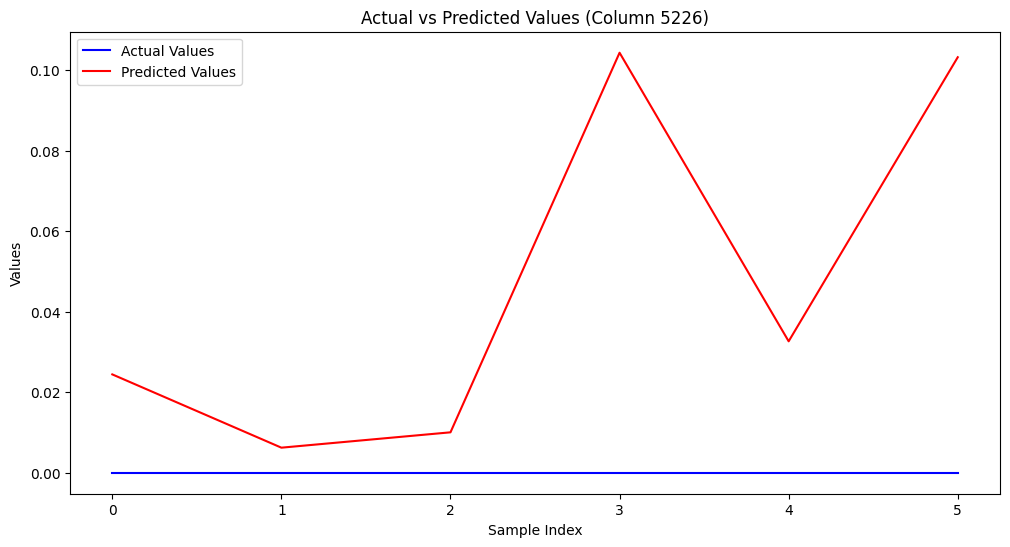

In [133]:
# 무작위로 하나의 열을 선택
random_column = np.random.randint(0, actual_values.shape[1])

# 선택된 열의 실제 값과 예측 값
actual_column = actual_values[:, random_column]
predicted_column = predictions[:, random_column]

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(actual_column)), actual_column, color='blue', label='Actual Values')
plt.plot(np.arange(len(predicted_column)), predicted_column, color='red', label='Predicted Values')
plt.title(f'Actual vs Predicted Values (Column {random_column})')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()

# x축 눈금을 정수 단위로 설정
plt.xticks(np.arange(len(actual_column)))

plt.show()

In [135]:
# 인덱스 0부터 시작
column_index = 1
actual_column = actual_values[:, column_index]
predicted_column = predictions[:, column_index]

# 실제값과 예측값 비교
comparison_df = pd.DataFrame({
    'Actual Values': actual_column,
    'Predicted Values': predicted_column
})

In [136]:
comparison_df

,Actual Values,Predicted Values
0,278.0,286.035553
1,289.0,274.632294
2,222.0,280.149902
3,307.0,360.725708
4,213.0,280.470673
5,307.0,340.002502


# 구인인원 예측

Trial 90 Complete [00h 00m 10s]
val_loss: 0.8100574016571045

Best val_loss So Far: 0.7115341424942017
Total elapsed time: 00h 13m 50s
Best units: 224
Best dropout_rate: 0.2
Best learning_rate: 0.001
Epoch 1/150
5/5 - 4s - loss: 0.9458 - 4s/epoch - 841ms/step
Epoch 2/150
5/5 - 0s - loss: 0.9187 - 245ms/epoch - 49ms/step
Epoch 3/150
5/5 - 0s - loss: 0.8729 - 278ms/epoch - 56ms/step
Epoch 4/150
5/5 - 0s - loss: 0.8269 - 262ms/epoch - 52ms/step
Epoch 5/150
5/5 - 0s - loss: 0.7910 - 252ms/epoch - 50ms/step
Epoch 6/150
5/5 - 0s - loss: 0.7688 - 247ms/epoch - 49ms/step
Epoch 7/150
5/5 - 0s - loss: 0.7553 - 249ms/epoch - 50ms/step
Epoch 8/150
5/5 - 0s - loss: 0.7450 - 261ms/epoch - 52ms/step
Epoch 9/150
5/5 - 0s - loss: 0.7359 - 255ms/epoch - 51ms/step
Epoch 10/150
5/5 - 0s - loss: 0.7273 - 241ms/epoch - 48ms/step
Epoch 11/150
5/5 - 0s - loss: 0.7208 - 251ms/epoch - 50ms/step
Epoch 12/150
5/5 - 0s - loss: 0.7155 - 246ms/epoch - 49ms/step
Epoch 13/150
5/5 - 0s - loss: 0.7086 - 245ms/epoch - 49

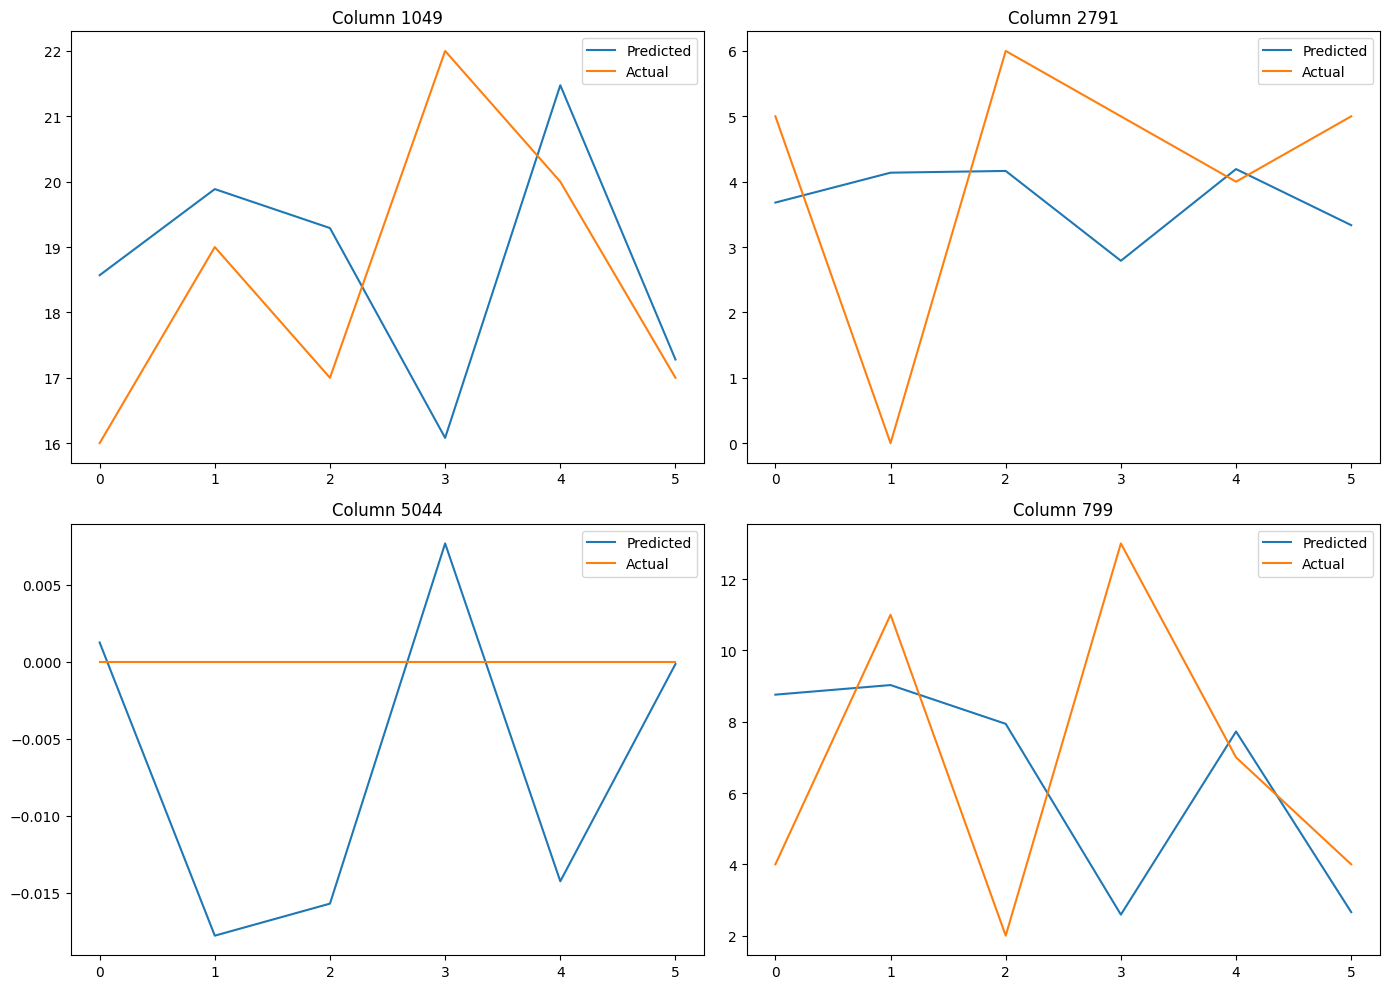

In [198]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Bidirectional, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import keras_tuner as kt
import os
import time

# 데이터 준비
def prepare_data(filepath):
    df = pd.read_csv(filepath)
    data = df.iloc[:, 1:].values.astype(float)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # 데이터 나누기
    train_data = data_scaled[:146, :]
    test_data = data_scaled[146:, :]
    
    return train_data, test_data, scaler

# 데이터 준비
filepath = '구인인원피봇.csv'  # 파일 경로를 실제 파일 경로로 변경하세요
train_data, test_data, scaler = prepare_data(filepath)

# 모델 빌더 함수
def model_builder(hp):
    model = Sequential()
    units = hp.Int('units', min_value=32, max_value=256, step=32)
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.add(Bidirectional(LSTM(units=units, return_sequences=True), input_shape=(1, train_data.shape[1])))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(LSTM(units=units//2, return_sequences=True))
    model.add(Dropout(dropout_rate/2))
    model.add(BatchNormalization())
    model.add(LSTM(units=units//2))
    model.add(Dense(train_data.shape[1])) 
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    
    return model

# 하이퍼파라미터 튜닝
def hyperparameter_tuning():
    tuner = kt.Hyperband(
        model_builder,
        objective='val_loss',
        max_epochs=50,
        factor=3,
        directory='hyperband_dir',
        project_name=f'lstm_hyperband_tuning_{int(time.time())-1}'  # 프로젝트 이름에 타임스탬프 추가
    )

    X_train = []
    y_train = []
    for i in range(len(train_data) - 1):
        X_train.append(train_data[i:i + 1, :])
        y_train.append(train_data[i + 1, :])
    X_train, y_train = np.array(X_train), np.array(y_train)

    tuner.search(X_train, y_train, epochs=50, validation_split=0.2)
    
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    
    print(f"Best units: {best_hps.get('units')}")
    print(f"Best dropout_rate: {best_hps.get('dropout_rate')}")
    print(f"Best learning_rate: {best_hps.get('learning_rate')}")
    
    return best_hps

# 최적의 하이퍼파라미터로 모델 학습
best_hps = hyperparameter_tuning()
model = model_builder(best_hps)

# 데이터 준비
X_train = []
y_train = []
for i in range(len(train_data) - 1):
    X_train.append(train_data[i:i + 1, :])
    y_train.append(train_data[i + 1, :])
X_train, y_train = np.array(X_train), np.array(y_train)

# 모델 학습
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=2)

# LSTM 모델 테스트
def test_lstm_model(model, test_data, scaler):
    X_test = []
    y_test = []
    for i in range(len(test_data) - 1):
        X_test.append(test_data[i:i + 1, :])
        y_test.append(test_data[i + 1, :])
    X_test, y_test = np.array(X_test), np.array(y_test)
    
    y_pred_scaled = model.predict(X_test)
    
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_test_orig = scaler.inverse_transform(y_test)
    
    return y_pred, y_test_orig

# 모델 테스트
predictions, actual_values = test_lstm_model(model, test_data, scaler)

# 랜덤으로 4개 열 골라서 예측값 실제값 시각화
num_columns = test_data.shape[1]
selected_columns = np.random.choice(num_columns, size=4, replace=False)

plt.figure(figsize=(14, 10))
for i, col_idx in enumerate(selected_columns, 1):
    plt.subplot(2, 2, i)
    plt.plot(predictions[:, col_idx], label='Predicted')
    plt.plot(actual_values[:, col_idx], label='Actual')
    plt.title(f'Column {col_idx}')
    plt.legend()

plt.tight_layout()
plt.show()


In [199]:
# 성능 평가
mae = mean_absolute_error(actual_values.flatten(), predictions.flatten())
mse = mean_squared_error(actual_values.flatten(), predictions.flatten())
rmse = np.sqrt(mse)
r2 = r2_score(actual_values.flatten(), predictions.flatten())

print(f"\nAverage MAE: {mae}")
print(f"Average MSE: {mse}")
print(f"Average RMSE: {rmse}")
print(f"Average R²: {r2}")


Average MAE: 9.213434290303907
Average MSE: 739.271869062193
Average RMSE: 27.189554410879797
Average R²: 0.7778450915702126


In [200]:
# 새로운 데이터 예측 함수
def predict_future(model, last_sequence, num_predictions, scaler):
    predictions = []
    current_sequence = last_sequence

    for _ in range(num_predictions):
        next_prediction = model.predict(current_sequence)
        predictions.append(next_prediction[0])
        
        # 다음 입력 시퀀스를 위해 current_sequence를 업데이트
        current_sequence = np.expand_dims(next_prediction, axis=0)

    predictions = np.array(predictions)
    predictions = scaler.inverse_transform(predictions)
    return predictions

# 마지막 테스트 시퀀스를 가져와 예측 시작
last_sequence = np.expand_dims(test_data[-1:], axis=0)
num_predictions = 12  # 1년치 예측

future_predictions = predict_future(model, last_sequence, num_predictions, scaler)

# 예측 결과 확인
print("Future Predictions (next 12 months):")
print(future_predictions)

1/1 [==============================] - 0s 18ms/step
Future Predictions (next 12 months):
[[ 2.4315037e+01  9.5291054e+01 -4.5800403e-02 ...  3.5111334e+00
   4.3502258e+01  6.0081367e+01]
 [ 1.8750147e+01  9.7093300e+01  1.4537658e+01 ...  4.1753368e+00
   4.5584232e+01  6.6442215e+01]
 [ 1.8864174e+01  9.6097015e+01  1.7064634e+01 ...  4.1787047e+00
   4.5685238e+01  6.6978455e+01]
 ...
 [ 1.8683619e+01  9.5464340e+01  1.7298925e+01 ...  4.2408800e+00
   4.5679459e+01  6.7284737e+01]
 [ 1.8682756e+01  9.5461555e+01  1.7298971e+01 ...  4.2411666e+00
   4.5679390e+01  6.7285942e+01]
 [ 1.8682333e+01  9.5460182e+01  1.7298971e+01 ...  4.2413073e+00
   4.5679359e+01  6.7286537e+01]]


In [204]:
# 컬럼 네임 지정
df = pd.read_csv('구인인원피봇.csv')
new_columns = df.columns[1:] 
new_columns

# 데이터 프레임으로 저장
future_guin_df = pd.DataFrame(future_predictions, columns = new_columns)
new_dates = pd.date_range(start='2024-04-01', end='2025-03-01', freq='MS')
future_guin_df.insert(0, '월', new_dates)
future_guin_df = future_guin_df.round(2)

# 숫자형 열만 선택
numeric_columns = future_guin_df.select_dtypes(include=['float32', 'int64']).columns

# 숫자형 열에서 마이너스 값을 모두 0으로 변경
future_guin_df[numeric_columns] = future_guin_df[numeric_columns].applymap(lambda x: max(x, 0))

future_guin_df.to_csv("구인예측직종.csv", index = False)

In [205]:
# 데이터 확인
future_guin_df

,월,강원도 강릉시_건설·채굴직(연구개발직 포함),강원도 강릉시_경영·회계·행정·사무직,강원도 강릉시_경호·경비·청소·기타 개인서비스직,강원도 강릉시_관리직,강원도 강릉시_교육 및 자연과학 사회과학연구관련직,강원도 강릉시_군인,강원도 강릉시_금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등),강원도 강릉시_금융·보험직,강원도 강릉시_기계 설치·정비·생산직,...,충청북도 충주시_식품 가공·생산직,충청북도 충주시_영업·판매직,충청북도 충주시_예술·디자인·방송직,충청북도 충주시_운전·운송직,충청북도 충주시_음식 서비스직,충청북도 충주시_인쇄·목재·공예 및 기타 설치·정비·생산직,충청북도 충주시_전기·전자 설치·정비·생산직,충청북도 충주시_정보통신 설치·정비직(연구개발직 포함),충청북도 충주시_제조 연구개발직 및 공학기술직,충청북도 충주시_화학·환경 설치·정비·생산직
0,2024-04-01,24.320000,95.290001,0.000000,6.81,5.16,0.0,13.91,2.90,12.51,...,46.040001,32.480000,4.86,63.450001,48.709999,13.600000,154.259995,3.51,43.500000,60.080002
1,2024-05-01,18.750000,97.089996,14.540000,7.39,4.99,0.0,13.26,3.33,13.84,...,49.509998,31.719999,4.42,64.239998,52.180000,17.889999,166.440002,4.18,45.580002,66.440002
2,2024-06-01,18.860001,96.099998,17.059999,7.19,4.76,0.0,13.43,3.33,13.96,...,49.709999,32.270000,4.38,64.150002,52.070000,16.680000,167.309998,4.18,45.689999,66.980003
3,2024-07-01,18.790001,95.800003,17.260000,7.15,4.76,0.0,13.47,3.34,13.99,...,49.939999,32.360001,4.36,64.209999,52.160000,16.670000,167.440002,4.21,45.680000,67.129997
4,2024-08-01,18.740000,95.639999,17.290001,7.14,4.77,0.0,13.49,3.35,14.01,...,50.060001,32.400002,4.34,64.239998,52.200001,16.680000,167.520004,4.22,45.680000,67.209999
5,2024-09-01,18.709999,95.550003,17.299999,7.14,4.77,0.0,13.49,3.35,14.01,...,50.130001,32.410000,4.34,64.250000,52.230000,16.690001,167.559998,4.23,45.680000,67.250000
6,2024-10-01,18.700001,95.500000,17.299999,7.13,4.78,0.0,13.50,3.35,14.01,...,50.169998,32.419998,4.33,64.260002,52.240002,16.700001,167.580002,4.24,45.680000,67.269997
7,2024-11-01,18.690001,95.480003,17.299999,7.13,4.78,0.0,13.50,3.35,14.02,...,50.180000,32.430000,4.33,64.260002,52.250000,16.700001,167.589996,4.24,45.680000,67.279999
8,2024-12-01,18.690001,95.470001,17.299999,7.13,4.78,0.0,13.50,3.35,14.02,...,50.189999,32.430000,4.33,64.269997,52.250000,16.709999,167.589996,4.24,45.680000,67.279999
9,2025-01-01,18.680000,95.459999,17.299999,7.13,4.78,0.0,13.50,3.35,14.02,...,50.200001,32.430000,4.33,64.269997,52.250000,16.709999,167.589996,4.24,45.680000,67.279999


# 구직건수 예측

Trial 90 Complete [00h 00m 18s]
val_loss: 0.8840702772140503

Best val_loss So Far: 0.8371039032936096
Total elapsed time: 00h 13m 35s
Best units: 256
Best dropout_rate: 0.2
Best learning_rate: 0.001
Epoch 1/150
5/5 - 5s - loss: 0.9914 - 5s/epoch - 930ms/step
Epoch 2/150
5/5 - 0s - loss: 0.9446 - 279ms/epoch - 56ms/step
Epoch 3/150
5/5 - 0s - loss: 0.8721 - 289ms/epoch - 58ms/step
Epoch 4/150
5/5 - 0s - loss: 0.8074 - 297ms/epoch - 59ms/step
Epoch 5/150
5/5 - 0s - loss: 0.7676 - 274ms/epoch - 55ms/step
Epoch 6/150
5/5 - 0s - loss: 0.7460 - 278ms/epoch - 56ms/step
Epoch 7/150
5/5 - 0s - loss: 0.7268 - 288ms/epoch - 58ms/step
Epoch 8/150
5/5 - 0s - loss: 0.7113 - 312ms/epoch - 62ms/step
Epoch 9/150
5/5 - 0s - loss: 0.6995 - 298ms/epoch - 60ms/step
Epoch 10/150
5/5 - 0s - loss: 0.6844 - 265ms/epoch - 53ms/step
Epoch 11/150
5/5 - 0s - loss: 0.6791 - 284ms/epoch - 57ms/step
Epoch 12/150
5/5 - 0s - loss: 0.6660 - 273ms/epoch - 55ms/step
Epoch 13/150
5/5 - 0s - loss: 0.6623 - 273ms/epoch - 55

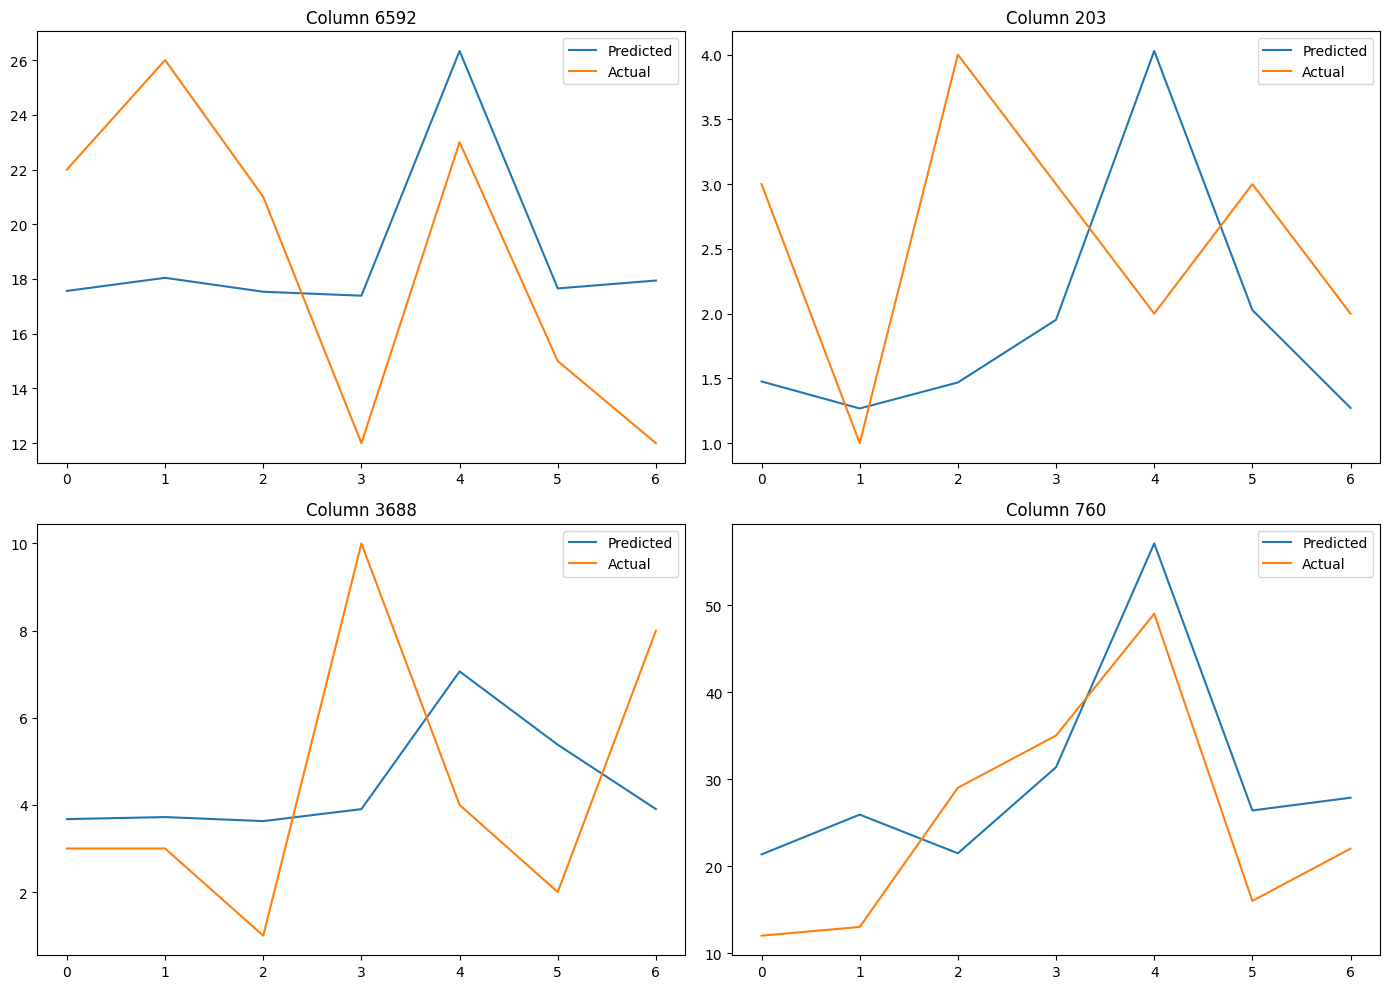

In [207]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Bidirectional, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import keras_tuner as kt
import os
import time

# 데이터 준비
def prepare_data(filepath):
    df = pd.read_csv(filepath)
    data = df.iloc[:, 1:].values.astype(float)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # 데이터 나누기
    train_data = data_scaled[:146, :]
    test_data = data_scaled[146:, :]
    
    return train_data, test_data, scaler

# 데이터 준비
filepath = '구직건수피봇.csv'  # 파일 경로를 실제 파일 경로로 변경하세요
train_data, test_data, scaler = prepare_data(filepath)

# 모델 빌더 함수
def model_builder(hp):
    model = Sequential()
    units = hp.Int('units', min_value=32, max_value=256, step=32)
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.add(Bidirectional(LSTM(units=units, return_sequences=True), input_shape=(1, train_data.shape[1])))
    model.add(Dropout(dropout_rate))
    model.add(BatchNormalization())
    model.add(LSTM(units=units//2, return_sequences=True))
    model.add(Dropout(dropout_rate/2))
    model.add(BatchNormalization())
    model.add(LSTM(units=units//2))
    model.add(Dense(train_data.shape[1])) 
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    
    return model

# 하이퍼파라미터 튜닝
def hyperparameter_tuning():
    tuner = kt.Hyperband(
        model_builder,
        objective='val_loss',
        max_epochs=50,
        factor=3,
        directory='hyperband_dir',
        project_name=f'lstm_hyperband_tuning000'  # 프로젝트 이름에 타임스탬프 추가
    )

    X_train = []
    y_train = []
    for i in range(len(train_data) - 1):
        X_train.append(train_data[i:i + 1, :])
        y_train.append(train_data[i + 1, :])
    X_train, y_train = np.array(X_train), np.array(y_train)

    tuner.search(X_train, y_train, epochs=50, validation_split=0.2)
    
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    
    print(f"Best units: {best_hps.get('units')}")
    print(f"Best dropout_rate: {best_hps.get('dropout_rate')}")
    print(f"Best learning_rate: {best_hps.get('learning_rate')}")
    
    return best_hps

# 최적의 하이퍼파라미터로 모델 학습
best_hps = hyperparameter_tuning()
model = model_builder(best_hps)

# 데이터 준비
X_train = []
y_train = []
for i in range(len(train_data) - 1):
    X_train.append(train_data[i:i + 1, :])
    y_train.append(train_data[i + 1, :])
X_train, y_train = np.array(X_train), np.array(y_train)

# 모델 학습
model.fit(X_train, y_train, epochs=150, batch_size=32, verbose=2)

# LSTM 모델 테스트
def test_lstm_model(model, test_data, scaler):
    X_test = []
    y_test = []
    for i in range(len(test_data) - 1):
        X_test.append(test_data[i:i + 1, :])
        y_test.append(test_data[i + 1, :])
    X_test, y_test = np.array(X_test), np.array(y_test)
    
    y_pred_scaled = model.predict(X_test)
    
    y_pred = scaler.inverse_transform(y_pred_scaled)
    y_test_orig = scaler.inverse_transform(y_test)
    
    return y_pred, y_test_orig

# 모델 테스트
predictions, actual_values = test_lstm_model(model, test_data, scaler)

# 랜덤으로 4개 열 골라서 예측값 실제값 시각화
num_columns = test_data.shape[1]
selected_columns = np.random.choice(num_columns, size=4, replace=False)

plt.figure(figsize=(14, 10))
for i, col_idx in enumerate(selected_columns, 1):
    plt.subplot(2, 2, i)
    plt.plot(predictions[:, col_idx], label='Predicted')
    plt.plot(actual_values[:, col_idx], label='Actual')
    plt.title(f'Column {col_idx}')
    plt.legend()

plt.tight_layout()
plt.show()


In [208]:
# 성능 평가
mae = mean_absolute_error(actual_values.flatten(), predictions.flatten())
mse = mean_squared_error(actual_values.flatten(), predictions.flatten())
rmse = np.sqrt(mse)
r2 = r2_score(actual_values.flatten(), predictions.flatten())

print(f"\nAverage MAE: {mae}")
print(f"Average MSE: {mse}")
print(f"Average RMSE: {rmse}")
print(f"Average R²: {r2}")


Average MAE: 6.301593952245271
Average MSE: 211.67193587630678
Average RMSE: 14.54894964855906
Average R²: 0.9565297828333921


In [209]:
# 새로운 데이터 예측 함수
def predict_future(model, last_sequence, num_predictions, scaler):
    predictions = []
    current_sequence = last_sequence

    for _ in range(num_predictions):
        next_prediction = model.predict(current_sequence)
        predictions.append(next_prediction[0])
        
        # 다음 입력 시퀀스를 위해 current_sequence를 업데이트
        current_sequence = np.expand_dims(next_prediction, axis=0)

    predictions = np.array(predictions)
    predictions = scaler.inverse_transform(predictions)
    return predictions

# 마지막 테스트 시퀀스를 가져와 예측 시작
last_sequence = np.expand_dims(test_data[-1:], axis=0)
num_predictions = 12  # 1년치 예측

future_predictions = predict_future(model, last_sequence, num_predictions, scaler)

# 예측 결과 확인
print("Future Predictions (next 12 months):")
print(future_predictions)

1/1 [==============================] - 0s 18ms/step
Future Predictions (next 12 months):
[[ 28.703436  294.01047    32.297466  ...   4.5294614  27.566626
   12.598288 ]
 [ 16.850935  264.29678    29.0034    ...   4.2758694  28.48471
   12.767374 ]
 [ 15.440328  261.02814    28.241488  ...   3.940068   28.568348
   12.393913 ]
 ...
 [ 15.151834  262.326      28.210459  ...   3.9429338  28.707962
   12.455335 ]
 [ 15.151841  262.326      28.210455  ...   3.9429328  28.707962
   12.455337 ]
 [ 15.151841  262.32596    28.210455  ...   3.9429333  28.707962
   12.455337 ]]


In [213]:
# 컬럼 네임 지정
df = pd.read_csv('구직건수피봇.csv')
new_columns = df.columns[1:] 
new_columns

# 데이터 프레임으로 저장
future_gujik_df = pd.DataFrame(future_predictions, columns = new_columns)
new_dates = pd.date_range(start='2024-04-01', end='2025-03-01', freq='MS')
future_gujik_df.insert(0, '월', new_dates)
future_gujik_df = future_gujik_df.round(0)

# 숫자형 열만 선택
numeric_columns = future_gujik_df.select_dtypes(include=['float32', 'int64']).columns

# 숫자형 열에서 마이너스 값을 모두 0으로 변경
future_gujik_df[numeric_columns] = future_gujik_df[numeric_columns].applymap(lambda x: max(x, 0))

future_gujik_df.to_csv("구직예측직종.csv", index = False)

In [214]:
# 데이터 확인
future_gujik_df

,월,강원도 강릉시_건설·채굴직(연구개발직 포함),강원도 강릉시_경영·회계·행정·사무직,강원도 강릉시_경호·경비·청소·기타 개인서비스직,강원도 강릉시_관리직,강원도 강릉시_교육 및 자연과학 사회과학연구관련직,강원도 강릉시_군인,강원도 강릉시_금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등),강원도 강릉시_금융·보험직,강원도 강릉시_기계 설치·정비·생산직,...,충청북도 충주시_식품 가공·생산직,충청북도 충주시_영업·판매직,충청북도 충주시_예술·디자인·방송직,충청북도 충주시_운전·운송직,충청북도 충주시_음식 서비스직,충청북도 충주시_인쇄·목재·공예 및 기타 설치·정비·생산직,충청북도 충주시_전기·전자 설치·정비·생산직,충청북도 충주시_정보통신 설치·정비직(연구개발직 포함),충청북도 충주시_제조 연구개발직 및 공학기술직,충청북도 충주시_화학·환경 설치·정비·생산직
0,2024-04-01,29.0,294.0,32.0,37.0,35.0,0.0,12.0,8.0,28.0,...,21.0,38.0,21.0,67.0,63.0,37.0,85.0,5.0,28.0,13.0
1,2024-05-01,17.0,264.0,29.0,32.0,26.0,0.0,10.0,7.0,25.0,...,22.0,40.0,18.0,67.0,60.0,36.0,80.0,4.0,28.0,13.0
2,2024-06-01,15.0,261.0,28.0,32.0,25.0,0.0,10.0,7.0,24.0,...,22.0,40.0,18.0,68.0,59.0,31.0,77.0,4.0,29.0,12.0
3,2024-07-01,15.0,262.0,28.0,33.0,25.0,0.0,10.0,7.0,24.0,...,22.0,40.0,18.0,68.0,59.0,31.0,77.0,4.0,29.0,12.0
4,2024-08-01,15.0,262.0,28.0,33.0,25.0,0.0,10.0,7.0,24.0,...,22.0,40.0,18.0,68.0,59.0,31.0,78.0,4.0,29.0,12.0
5,2024-09-01,15.0,262.0,28.0,33.0,25.0,0.0,10.0,7.0,24.0,...,22.0,40.0,18.0,68.0,59.0,31.0,78.0,4.0,29.0,12.0
6,2024-10-01,15.0,262.0,28.0,33.0,25.0,0.0,10.0,7.0,24.0,...,22.0,40.0,18.0,68.0,59.0,31.0,78.0,4.0,29.0,12.0
7,2024-11-01,15.0,262.0,28.0,33.0,25.0,0.0,10.0,7.0,24.0,...,22.0,40.0,18.0,68.0,59.0,31.0,78.0,4.0,29.0,12.0
8,2024-12-01,15.0,262.0,28.0,33.0,25.0,0.0,10.0,7.0,24.0,...,22.0,40.0,18.0,68.0,59.0,31.0,78.0,4.0,29.0,12.0
9,2025-01-01,15.0,262.0,28.0,33.0,25.0,0.0,10.0,7.0,24.0,...,22.0,40.0,18.0,68.0,59.0,31.0,78.0,4.0,29.0,12.0


# 추후 과제 (구인인원, 구직인원 컬럼별 예측)

In [194]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import tensorflow as tf

# # Load the data
# file_path = '구인인원피봇.csv'
# data = pd.read_csv(file_path)

# # Converting '월' column to datetime
# data['월'] = pd.to_datetime(data['월'])
# data.set_index('월', inplace=True)

# # Function to create dataset
# def create_dataset(data, time_step=1):
#     X, Y = [], []
#     for i in range(len(data) - time_step):
#         a = data[i:(i + time_step), 0]
#         X.append(a)
#         Y.append(data[i + time_step, 0])
#     return np.array(X), np.array(Y)

# # Parameters
# time_step = 12
# train_size = 125
# epochs = 50
# batch_size = 1
# future_steps = 12  # For 1 year

# # Results list
# results = []

# # Future predictions DataFrame
# future_predictions_df = pd.DataFrame()

# # Iterate over each column (region) in the dataframe
# results = []
# for column in data.columns:
#     print(f"Processing {column}")
    
#     y = data[column]

#     # Normalize the dataset
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

#     # Convert the dataset into a suitable shape for LSTM
#     X, Y = create_dataset(y_scaled, time_step)

#     # Split the data into training and testing sets
#     X_train, X_test = X[:train_size], X[train_size:]
#     Y_train, Y_test = Y[:train_size], Y[train_size:]

#     # Reshape input to be [samples, time steps, features] which is required for LSTM
#     X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
#     X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#     # Build the LSTM model
#     model = Sequential()
#     model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
#     model.add(LSTM(50, return_sequences=False))
#     model.add(Dense(1))
#     model.compile(optimizer='adam', loss='mean_squared_error')

#     # Train the model
#     model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=0)

#     # Make predictions
#     train_predict = model.predict(X_train)
#     test_predict = model.predict(X_test)

#     # Transform back to original scale
#     train_predict = scaler.inverse_transform(train_predict)
#     test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
#     Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))
#     Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

#     # Evaluate the model
#     train_mse = mean_squared_error(Y_train, train_predict)
#     test_mse = mean_squared_error(Y_test, test_predict)
#     train_mae = mean_absolute_error(Y_train, train_predict)
#     test_mae = mean_absolute_error(Y_test, test_predict)
#     train_r2 = r2_score(Y_train, train_predict)
#     test_r2 = r2_score(Y_test, test_predict)

#     # Store results
#     results.append({
#         'Region': column,
#         'Train MSE': train_mse,
#         'Test MSE': test_mse,
#         'Train MAE': train_mae,
#         'Test MAE': test_mae,
#         'Train R2': train_r2,
#         'Test R2': test_r2
#     })

#     # Future prediction
#     last_train_batch = X_test[-1]
#     future_predictions = []

#     for _ in range(future_steps):
#         last_train_batch = last_train_batch.reshape((1, time_step, 1))
#         next_prediction = model.predict(last_train_batch)
#         future_predictions.append(next_prediction[0, 0])
#         next_prediction = next_prediction.reshape((1, 1, 1))
#         last_train_batch = np.append(last_train_batch[:, 1:, :], next_prediction, axis=1)

#     # Transform future predictions back to original scale
#     future_predictions = np.array(future_predictions).reshape(-1, 1)
#     future_predictions = scaler.inverse_transform(future_predictions)

#     # Create a date range for future predictions
#     last_date = y.index[-1]
#     future_dates = pd.date_range(last_date, periods=future_steps + 1, freq='MS')[1:]

#     # Create a DataFrame to hold the future predictions
#     future_df = pd.DataFrame(future_predictions, index=future_dates, columns=[f'{column} Future Predictions'])

#     # Concatenate future predictions to the main DataFrame
#     future_predictions_df = pd.concat([future_predictions_df, future_df], axis=1)

# # Create DataFrame to display results
# results_df = pd.DataFrame(results)

# # Save the results and future predictions to CSV
# results_df.to_csv('model_evaluation_metrics.csv', index=False)
# future_predictions_df.to_csv('future_predictions.csv')


Processing 강원도 강릉시_건설·채굴직(연구개발직 포함)
1/1 [==============================] - 0s 17ms/step
Processing 강원도 강릉시_경영·회계·행정·사무직
1/1 [==============================] - 0s 14ms/step
Processing 강원도 강릉시_경호·경비·청소·기타 개인서비스직
1/1 [==============================] - 0s 14ms/step
Processing 강원도 강릉시_관리직
1/1 [==============================] - 0s 14ms/step
Processing 강원도 강릉시_교육 및 자연과학 사회과학연구관련직
1/1 [==============================] - 0s 16ms/step
Processing 강원도 강릉시_군인
1/1 [==============================] - 0s 13ms/step
Processing 강원도 강릉시_금속·재료 설치·정비·생산직(판금·단조·주조·용접·도장 등)
1/1 [==============================] - 0s 13ms/step
Processing 강원도 강릉시_금융·보험직
1/1 [==============================] - 0s 13ms/step
Processing 강원도 강릉시_기계 설치·정비·생산직
1/1 [==============================] - 0s 12ms/step
Processing 강원도 강릉시_농림어업직
1/1 [==============================] - 0s 14ms/step
Processing 강원도 강릉시_돌봄 서비스직(간병·육아)
1/1 [==============================] - 0s 13ms/step
Processing 강원도 강릉시_미용·숙박·여행·오락·스포츠직
1/1 [===========================

KeyboardInterrupt: 